# Convert to Images, Train-Test split, Saving Images to Folders

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import scipy
import scipy.io
import pathlib
from IPython.display import display
import imageio
from PIL import Image
from collections import defaultdict
import math

In [4]:
#set working directory. insert your directory here
wd = '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1'
os.chdir(wd)

In [7]:
#Load Dataset (mat file) using scipy function
data = scipy.io.loadmat(wd + '/Dataset/illumination.mat')

In [8]:
#Convert into Images 40x48 and rotate it to display 
def convert_to_img(vector_img):
    img = vector_img.reshape(40,48)
    return Image.fromarray(img).rotate(270,expand=True) #preserve the entire image while rotating

In [9]:
#saving images for each person (0-67) and their 21 illuminations (0-21 for each person)

""" The file 'illumination.mat' has a variable "illum" of size 1920x21x68.
reshape(illum(:, i,j), 48, 40) gives i^th image of j^th subject.
"""
        #create temp directories and put images in them
image_mat = data['illum']
for i in range(image_mat.shape[1]):
    for j in range(image_mat.shape[2]):

        face, illumn = '{0:0=2d}'.format(j), '{0:0=2d}'.format(i)
        pathlib.Path(wd+'/Dataset/illumination_tmp/face{0}'.format(face)).mkdir(parents=True, exist_ok=True)
        img = convert_to_img(image_mat[:,i,j])
        illum_name = 'face{0}_illumn{1}.tif'.format(face,illumn)
        img.save(wd+'/Dataset/illumination_tmp/face{0}/{1}'.format(face,illum_name))


In [13]:
#Train-test split 70 -training, 30- test
random.seed(100)
train_test_split = 0.7 
train = []
test = []
subdir = wd+'/Dataset/illumination_tmp/'
faces = next(os.walk(subdir))[1]  # To loop through all the person folders

for illums in faces:
    filenames = os.listdir(subdir + illums)
    image_names = [filename for filename in filenames]
    image_paths = [subdir + illums + os.sep + image_name for image_name in image_names]
    random.shuffle(image_paths) # shuffe data
    train = train + image_paths[:int(train_test_split*len(image_names))]
    test = test + image_paths[int(train_test_split*len(image_names)):]

In [14]:
print("train=",len(train))
print("test=",len(test))

train= 952
test= 476


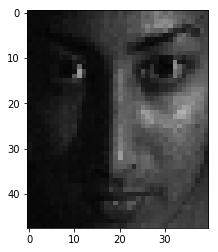

In [15]:
#Display an Image
def load_image(img):
    return imageio.imread(img).flatten(order='F')  # column-major flatten

img = load_image(test[10])
img = convert_to_img(img)
plt.imshow(img)
plt.show()


In [16]:
#Pre-processing- Averaging. -Add up all the pixel values divided by the total length
def avg_image(train_data):
    average_image = [0]
    for filename in train_data:
        average_image += load_image(filename)
    average_image /= len(train_data)
    return average_image

In [17]:

average_train = avg_image(train)
def mean_image(img):
    img = load_image(img)
    return img-average_train

In [18]:
#create train and test directory seperatly for convinience
pathlib.Path(wd+'/final_data/train').mkdir(parents=True, exist_ok=True) 
pathlib.Path(wd+'/final_data/test').mkdir(parents=True, exist_ok=True)

In [19]:
train[1]
chunk = train[1].split('/')
print(chunk)

['', 'home', 'rajesh', 'Documents', 'Rajeshwar_N_S_ML_Proj_1', 'Dataset', 'illumination_tmp', 'face48', 'face48_illumn15.tif']


In [20]:
#Saving training images
for face in train:
    face_no = face.split('/') #extracting face number (saving in similar format as illumination)
    pathlib.Path(wd+'/final_data/train/' + face_no[-2]).mkdir(parents=True, exist_ok=True)
    filepath = '/'.join([wd+"/final_data/train"] + face_no[-2:])
    img = convert_to_img(mean_image(face))
    img.save(filepath)

In [21]:
#Saving test Images
for face in test:
    face_no = face.split('/') #extracting face number (saving in similar format as illumination)
    pathlib.Path(wd+'/final_data/test/' + face_no[-2]).mkdir(parents=True, exist_ok=True)
    filepath = '/'.join([wd+"/final_data/test"] + face_no[-2:])
    img = convert_to_img(mean_image(face))
    img.save(filepath)

In [22]:
Train_data = wd+'/final_data/train/'
Test_data = wd+'/final_data/test/'

In [24]:
#code snippet to access the names of face folders and illuminations of trainset
illum_dir_train = []
face_dir_train = []
import os
for root, dirs, files in os.walk(Train_data):
   for name in files:
      illum_dir_train.append(name)
   for name in dirs:
      face_dir_train.append(os.path.join(root, name))
#illum_dir_train

['face48_illumn10.tif',
 'face48_illumn07.tif',
 'face48_illumn00.tif',
 'face48_illumn14.tif',
 'face48_illumn02.tif',
 'face48_illumn19.tif',
 'face48_illumn08.tif',
 'face48_illumn03.tif',
 'face48_illumn17.tif',
 'face48_illumn13.tif',
 'face48_illumn01.tif',
 'face48_illumn05.tif',
 'face48_illumn20.tif',
 'face48_illumn15.tif',
 'face61_illumn12.tif',
 'face61_illumn01.tif',
 'face61_illumn10.tif',
 'face61_illumn09.tif',
 'face61_illumn15.tif',
 'face61_illumn00.tif',
 'face61_illumn18.tif',
 'face61_illumn04.tif',
 'face61_illumn06.tif',
 'face61_illumn19.tif',
 'face61_illumn05.tif',
 'face61_illumn03.tif',
 'face61_illumn08.tif',
 'face61_illumn14.tif',
 'face08_illumn01.tif',
 'face08_illumn15.tif',
 'face08_illumn09.tif',
 'face08_illumn07.tif',
 'face08_illumn17.tif',
 'face08_illumn12.tif',
 'face08_illumn14.tif',
 'face08_illumn16.tif',
 'face08_illumn04.tif',
 'face08_illumn18.tif',
 'face08_illumn13.tif',
 'face08_illumn00.tif',
 'face08_illumn11.tif',
 'face08_illumn0

In [25]:
#face and illuminations of test set
illum_dir_test = []
face_dir_test = []
import os
for root, dirs, files in os.walk(Test_data):
   for name in files:
      illum_dir_test.append(name)
   for name in dirs:
     face_dir_test.append(os.path.join(root, name))

In [26]:
#face_dir_test

['/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face48',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face61',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face08',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face30',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face46',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face03',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face52',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face50',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face10',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face19',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face32',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face07',
 '/home/rajesh/Documents/Rajeshwar_N_S_ML_Proj_1/final_data/test/face56',
 '/home/rajesh/Documents/Rajeshwar_N_S

In [27]:
#Extracting the name of face from the filepath for labeling
chunk = face_dir_train[0].split('train/')
print("Example \n",chunk[-1])

chunk_2 = illum_dir_train[1].split('_')
print(chunk_2[-2])

#chunk[-1]==chunk_2[-2]

Example 
 face48
face48


True

In [23]:
"""for name in parent:
    chunk = name.split('train/')
    for name_1 in links:
        chunk_2 = name_1.split('_')
        if(chunk[-1]==chunk_2[-2]):
            img = imageio.imread(name+ '/' +name_1).flatten(order='F')
        else:
            continue"""
        

In [28]:
#storing images in a list in order 
img = []
for name in face_dir_train:
    chunk = name.split('train/')
    for name_1 in illum_dir_train:
        chunk_2 = name_1.split('_')
        if(chunk[-1]==chunk_2[-2]):
            img.append(imageio.imread(name+ '/' +name_1).flatten(order='F'))
        else:
            continue
        

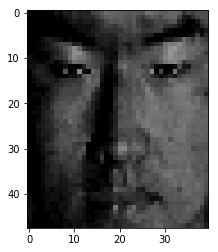

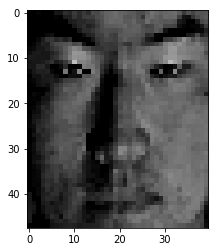

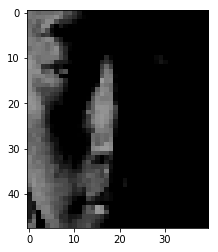

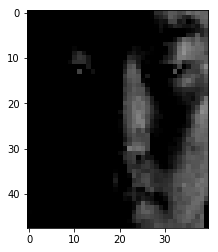

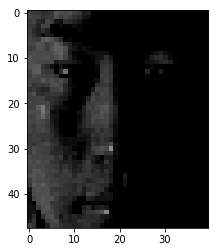

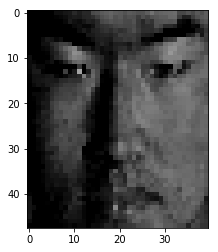

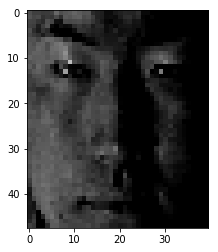

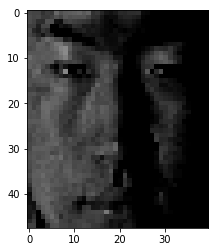

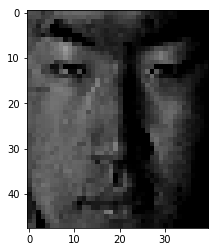

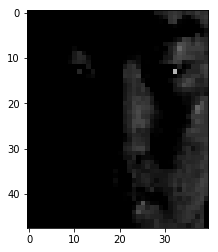

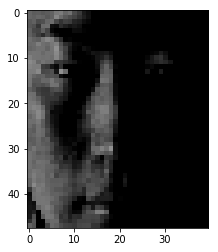

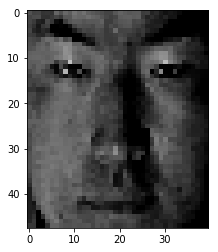

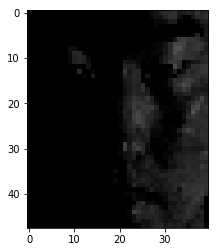

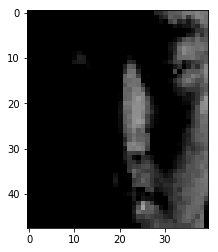

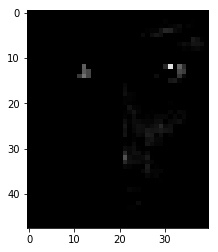

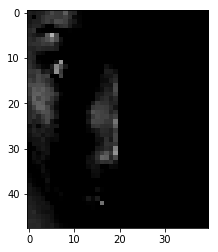

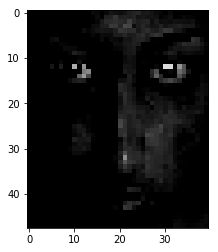

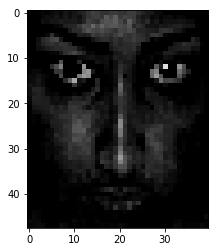

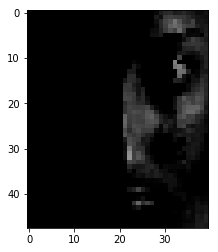

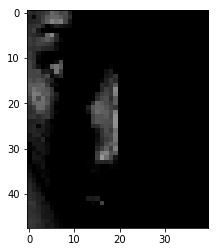

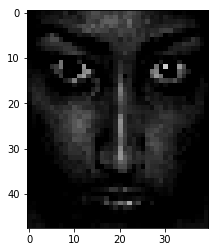

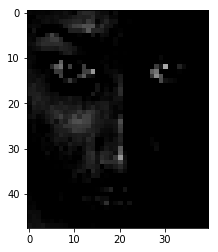

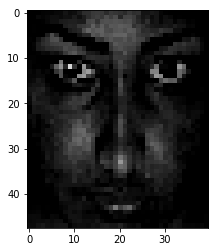

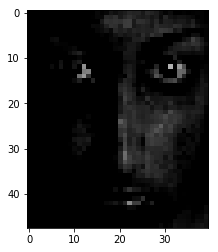

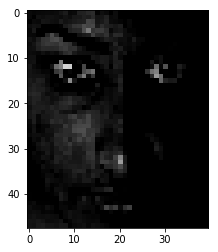

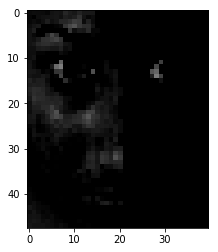

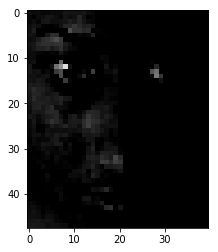

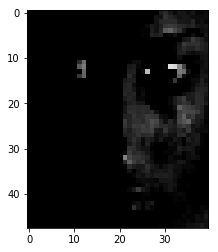

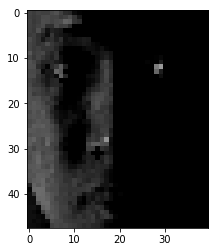

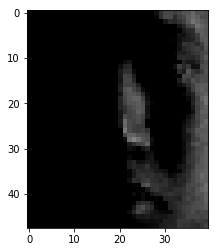

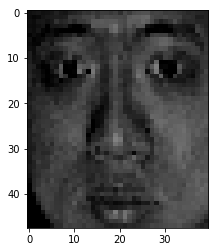

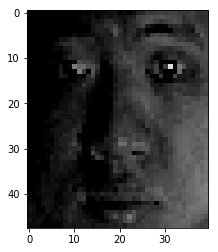

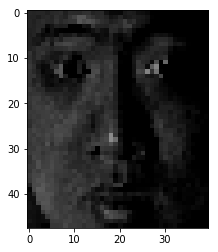

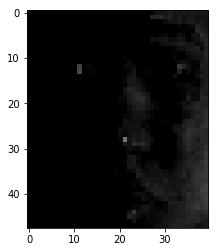

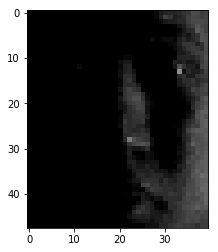

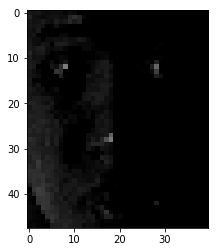

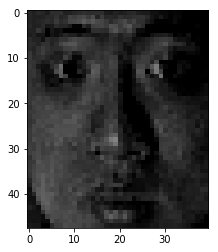

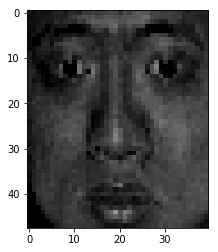

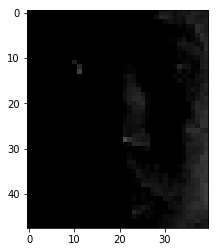

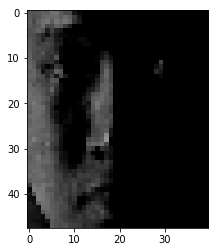

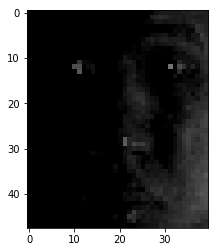

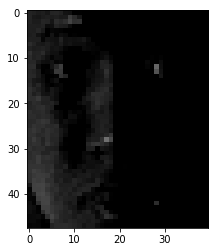

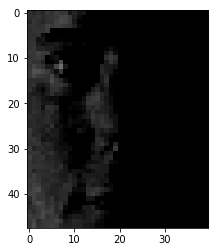

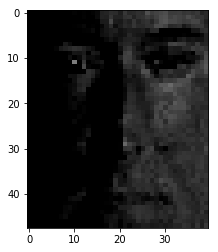

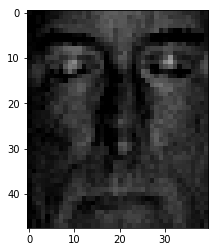

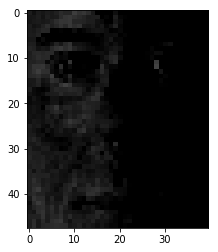

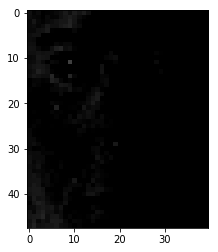

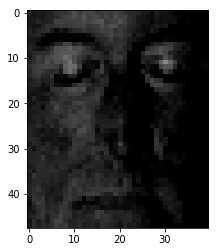

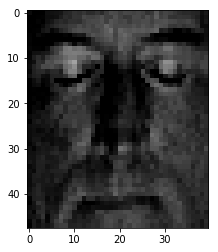

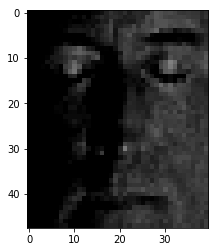

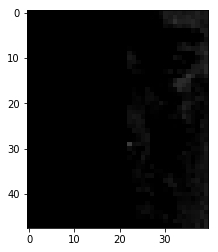

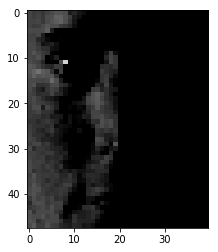

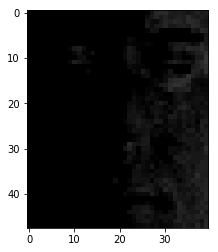

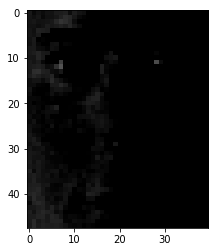

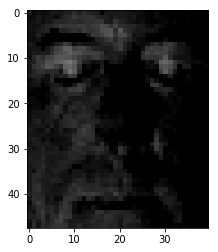

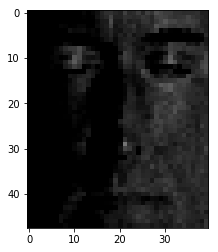

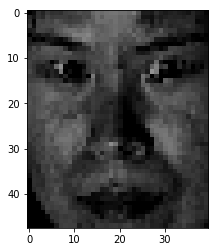

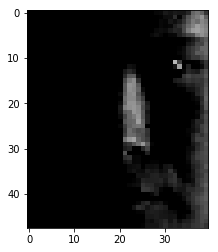

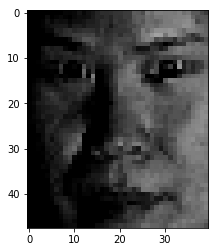

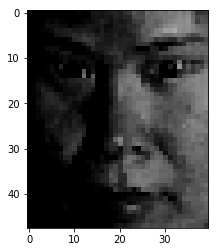

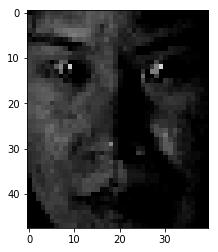

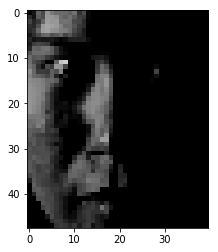

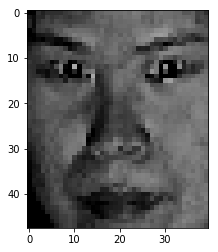

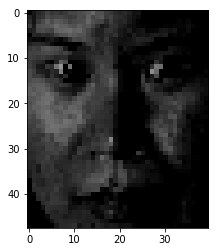

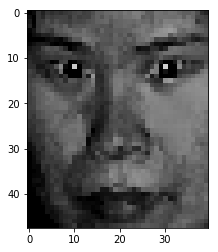

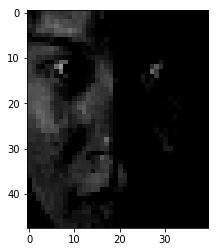

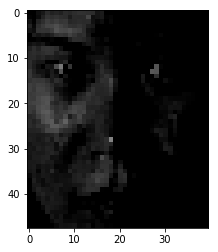

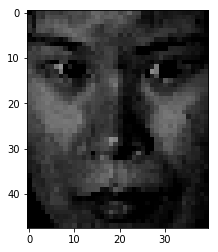

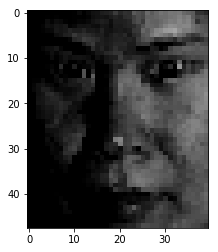

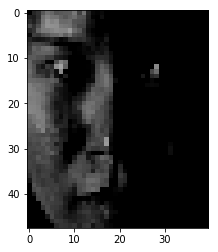

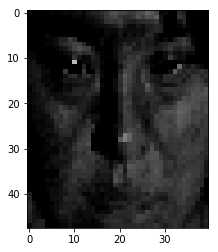

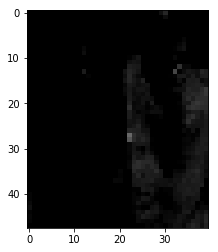

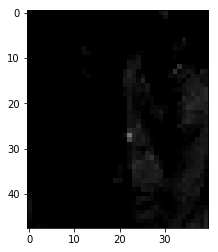

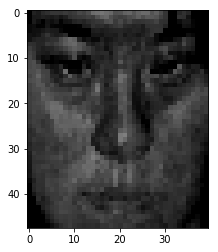

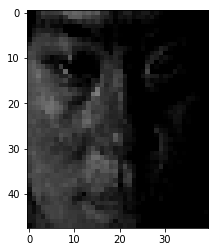

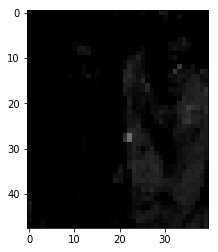

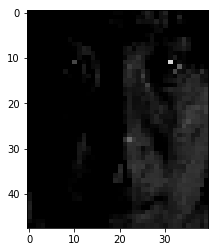

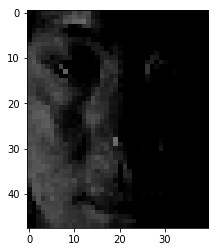

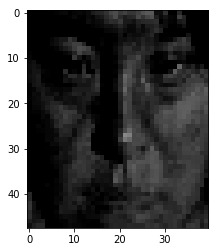

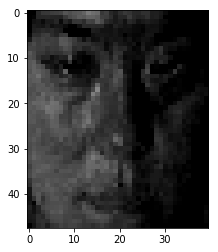

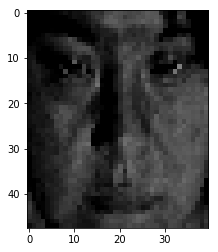

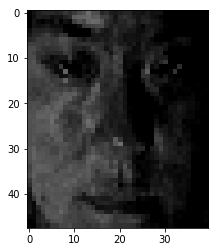

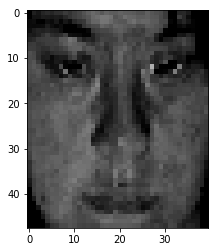

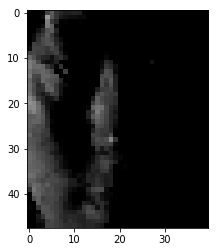

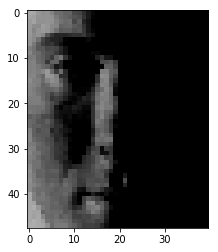

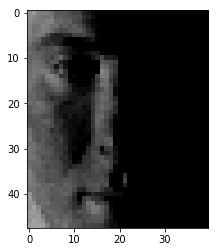

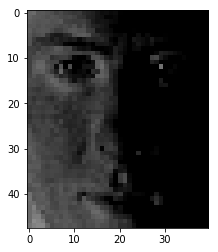

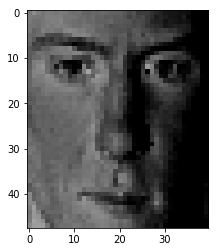

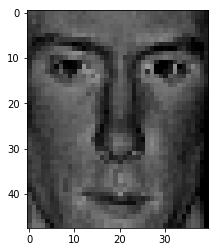

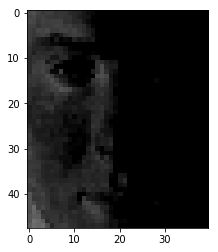

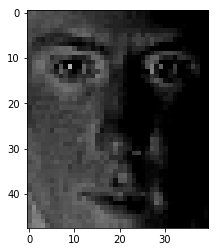

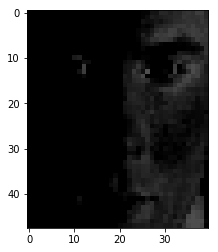

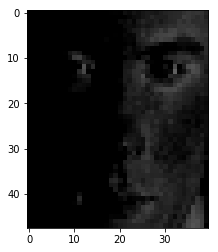

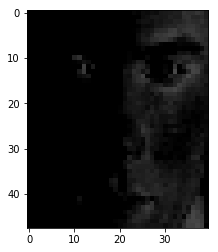

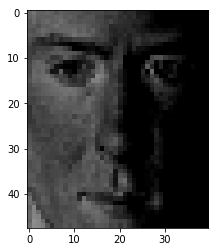

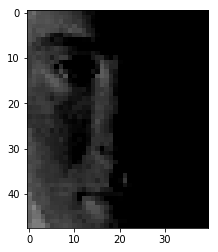

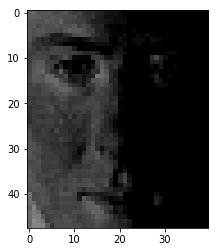

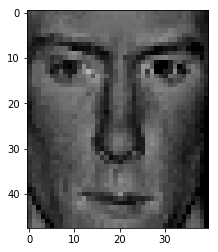

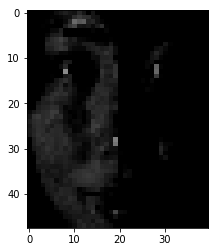

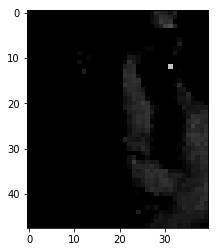

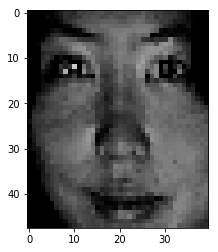

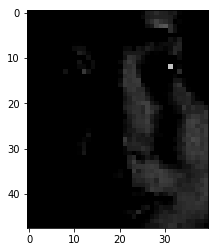

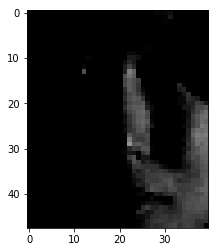

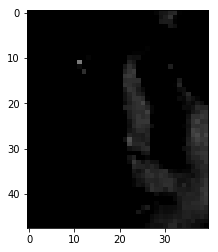

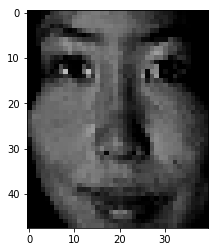

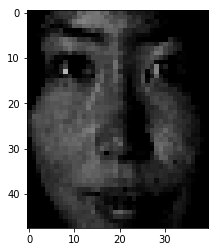

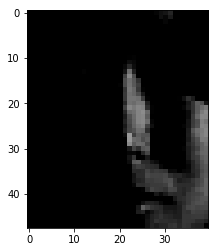

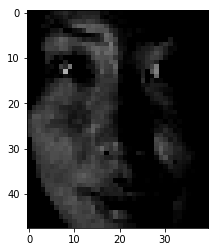

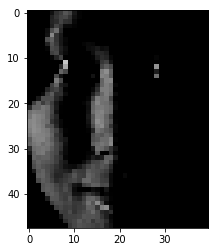

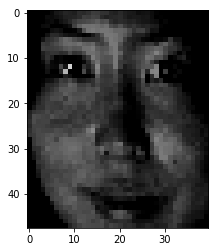

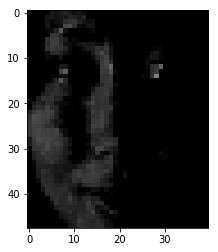

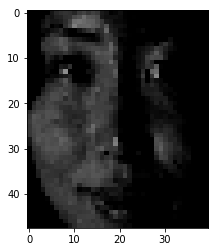

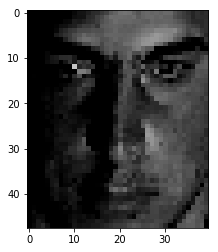

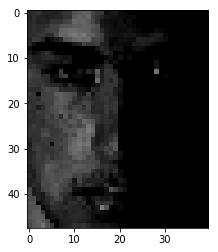

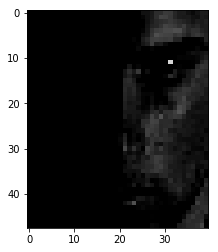

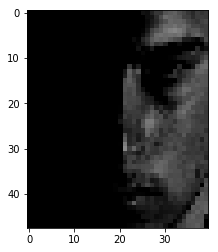

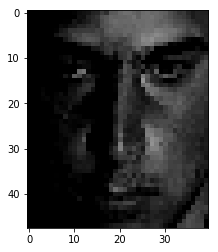

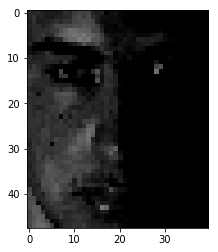

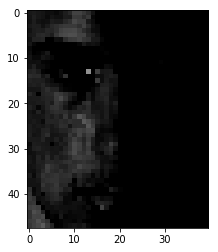

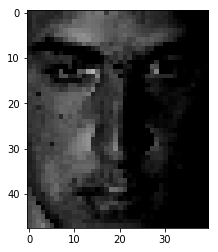

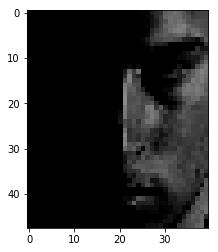

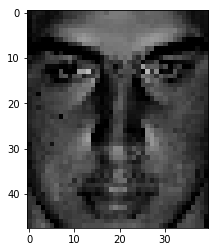

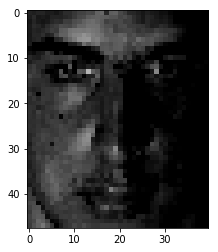

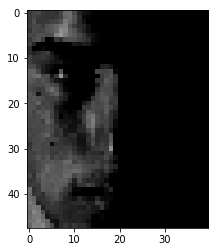

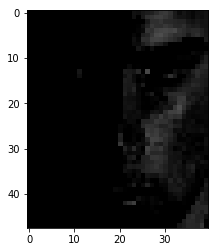

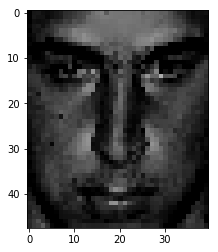

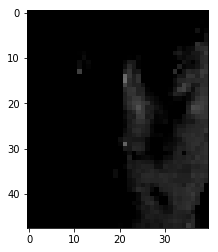

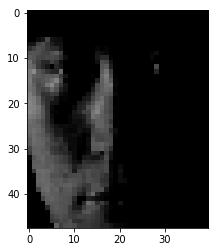

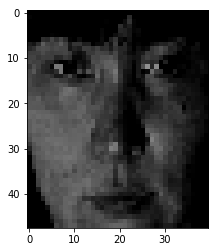

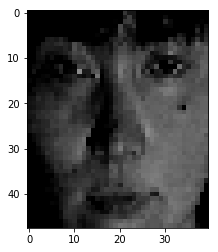

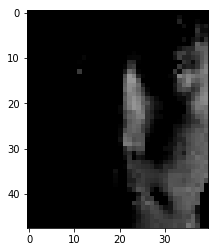

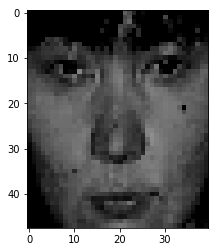

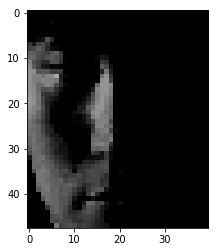

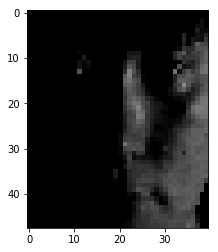

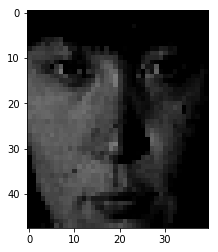

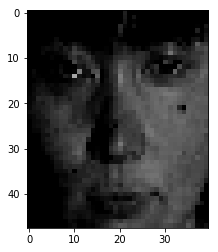

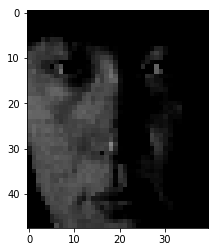

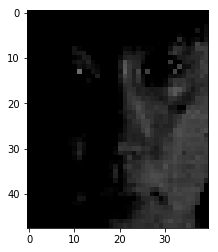

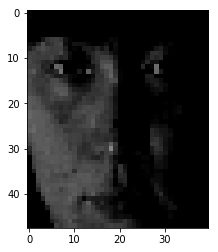

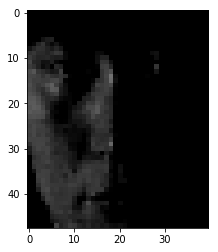

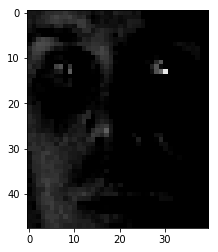

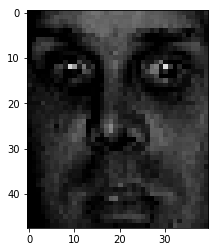

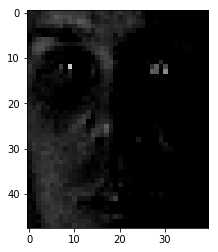

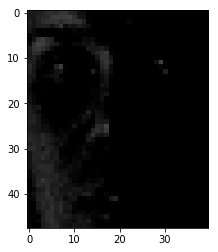

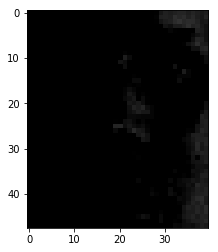

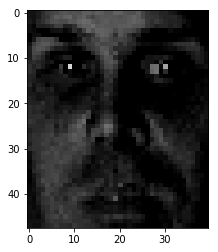

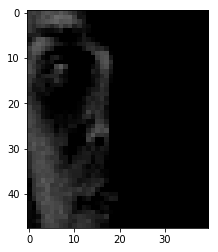

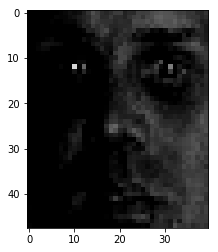

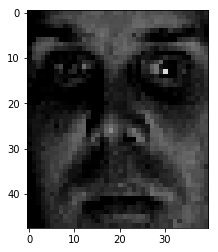

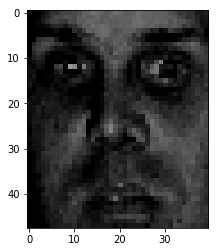

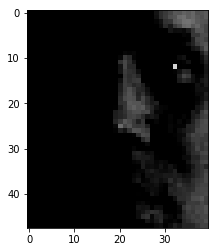

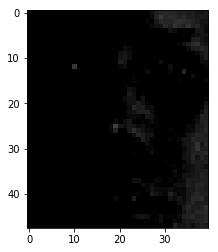

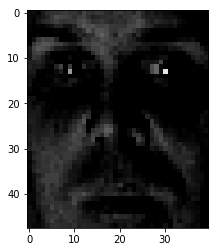

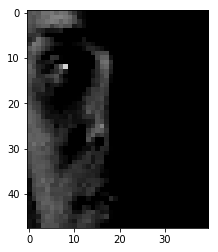

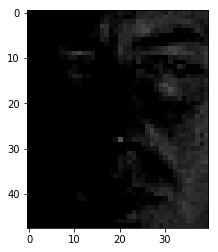

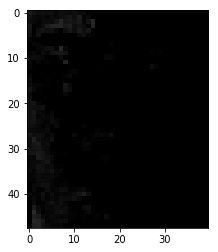

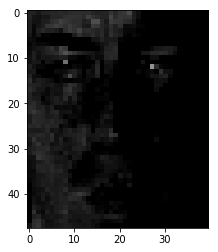

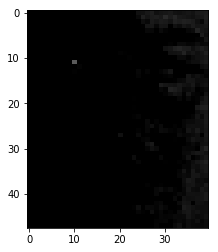

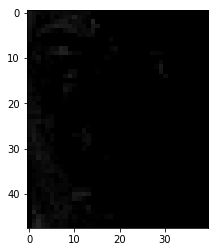

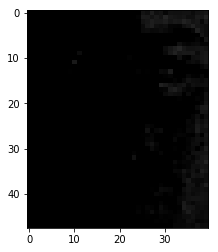

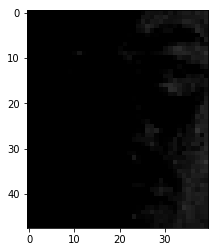

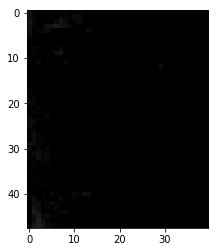

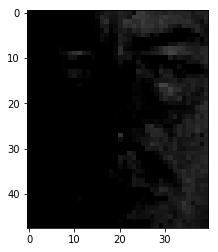

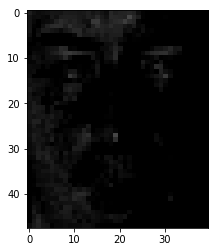

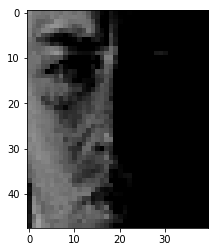

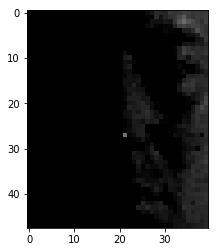

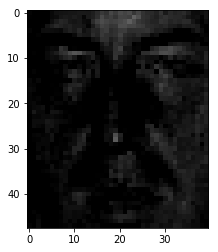

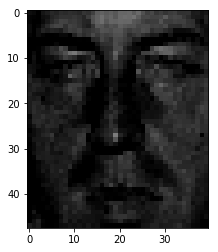

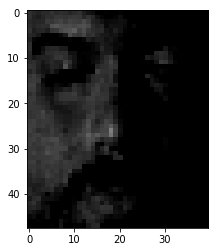

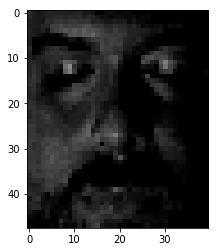

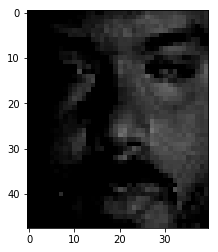

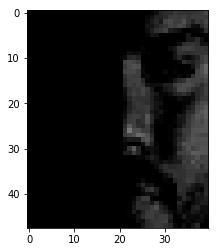

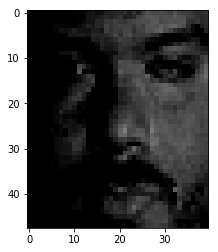

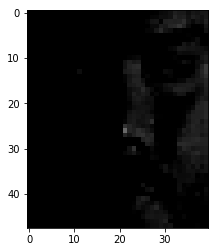

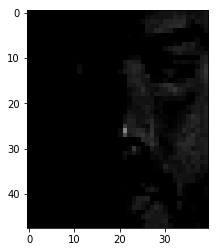

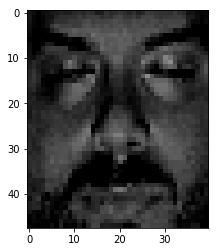

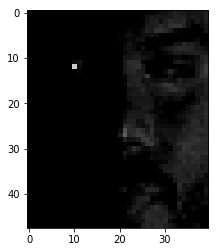

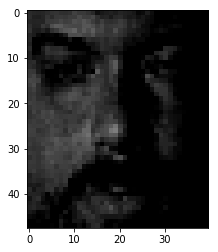

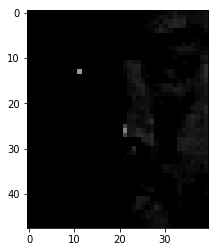

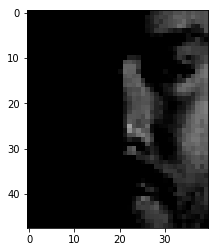

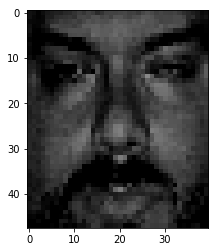

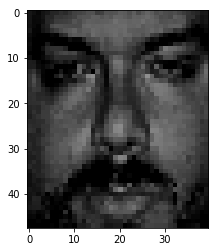

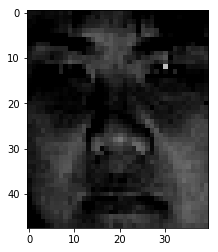

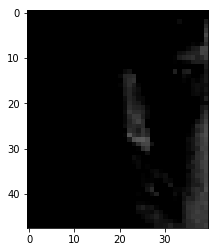

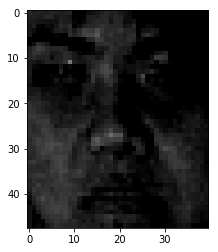

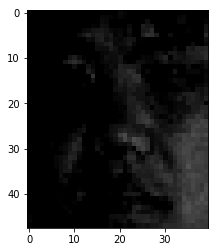

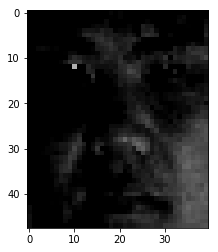

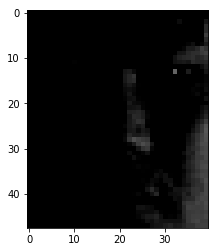

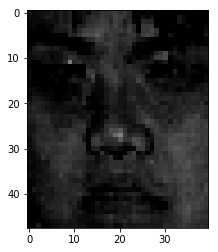

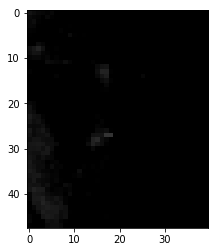

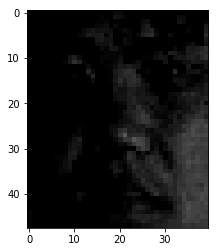

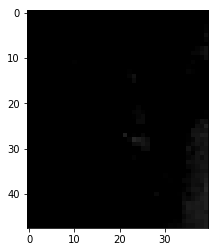

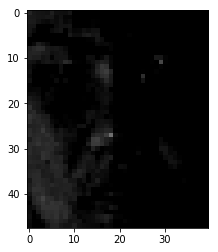

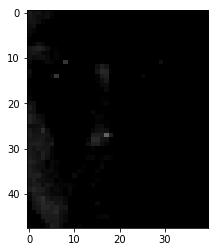

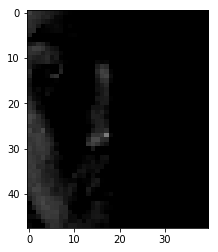

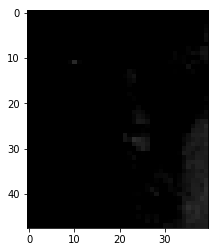

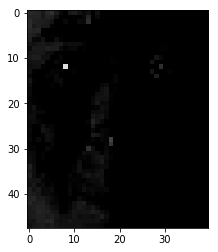

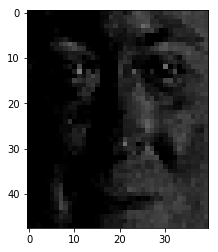

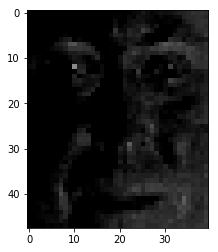

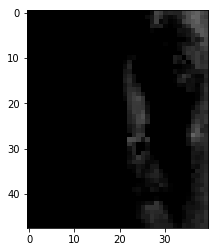

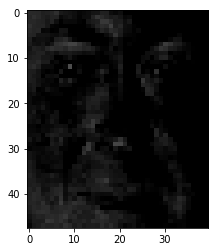

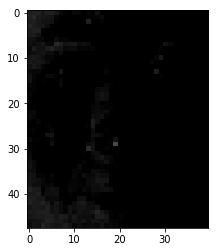

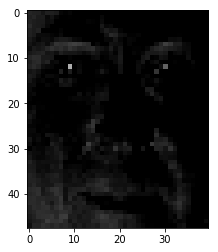

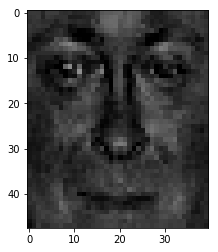

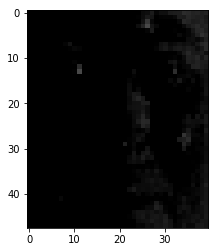

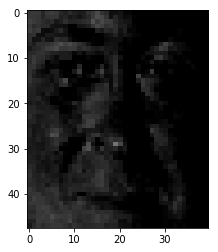

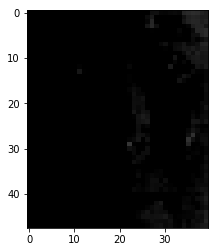

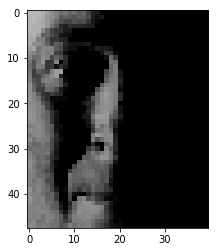

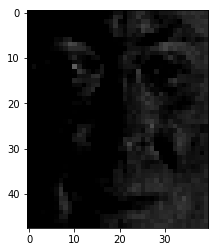

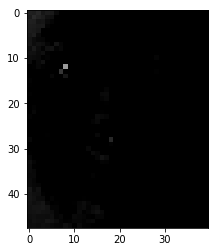

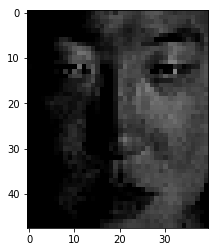

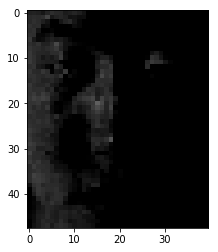

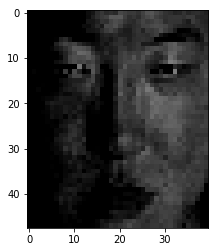

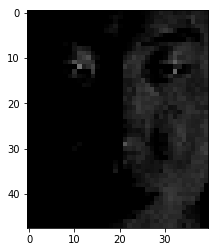

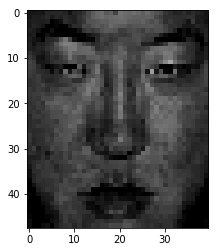

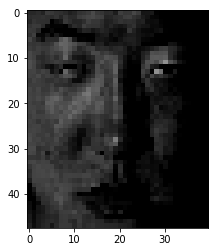

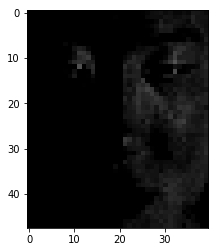

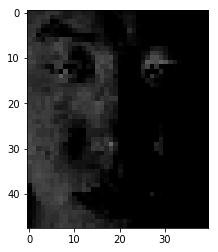

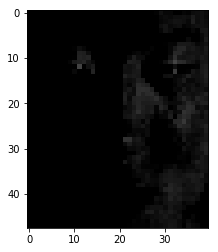

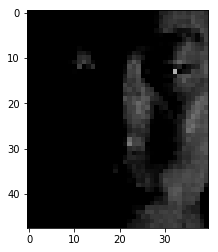

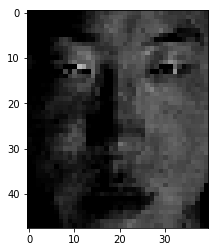

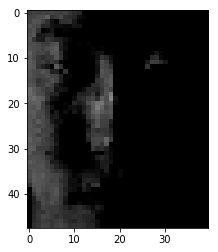

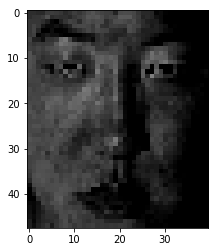

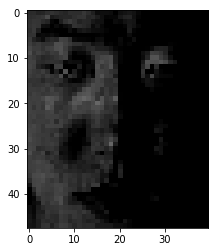

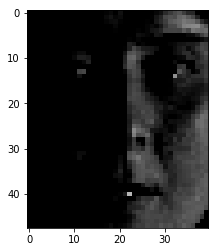

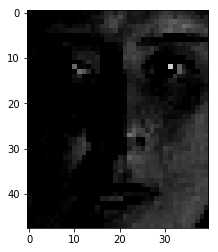

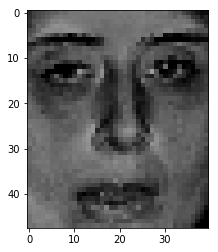

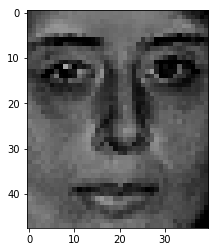

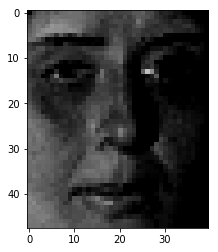

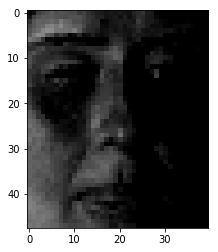

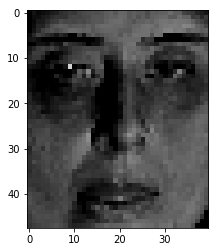

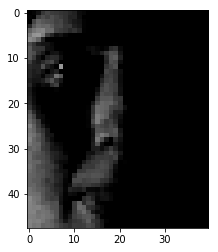

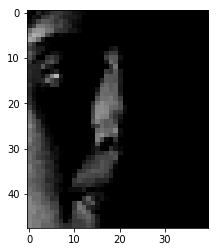

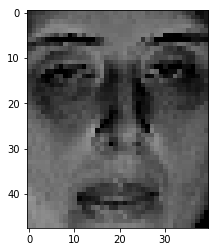

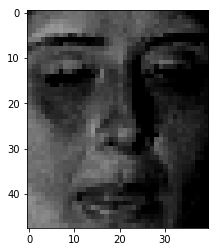

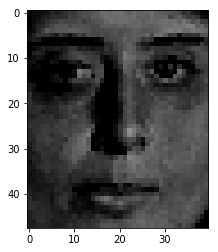

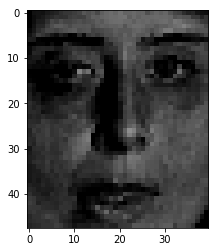

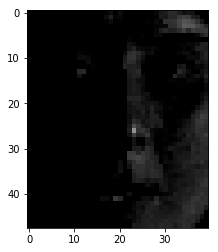

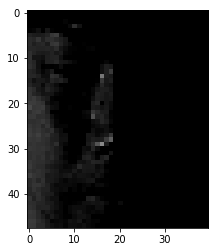

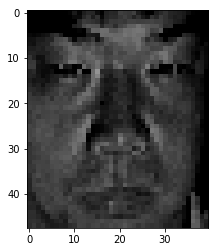

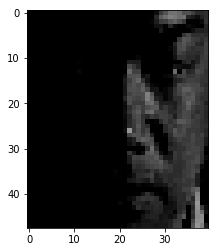

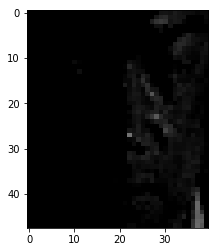

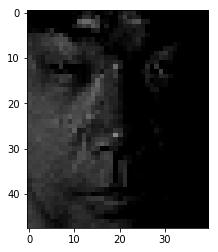

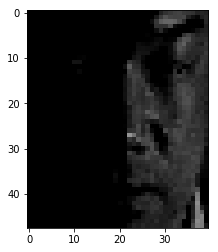

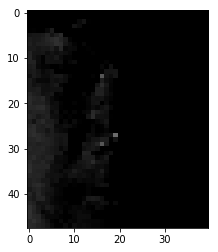

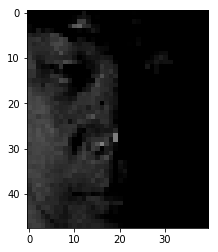

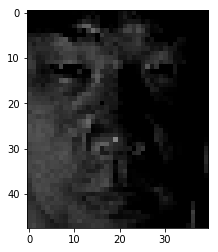

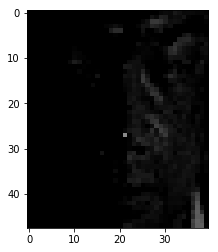

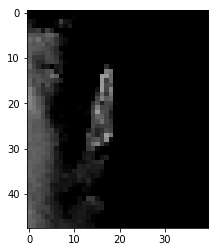

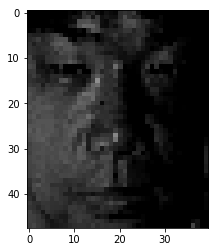

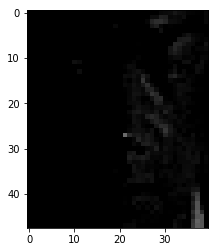

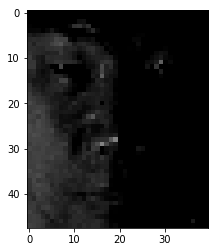

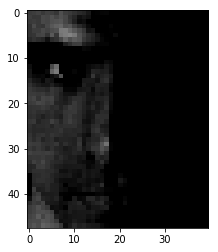

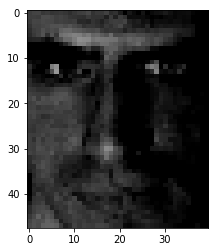

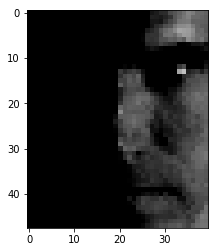

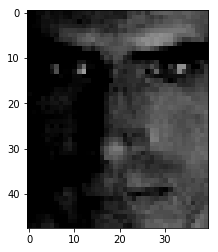

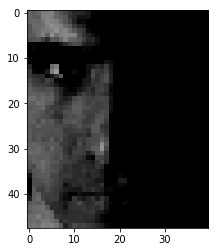

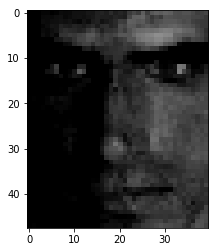

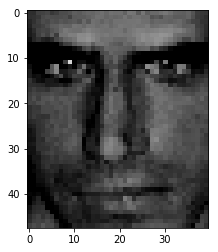

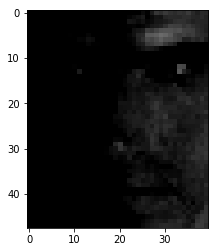

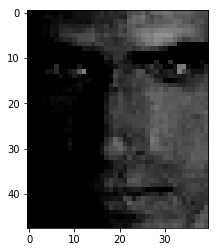

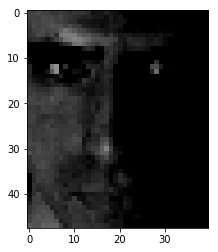

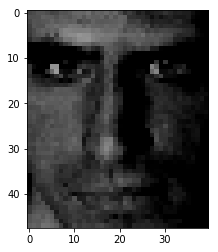

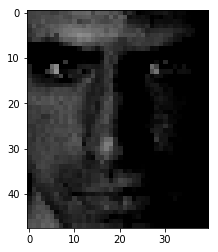

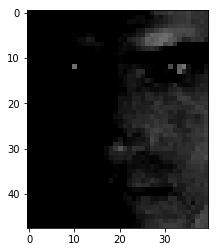

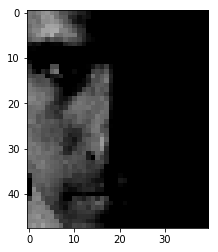

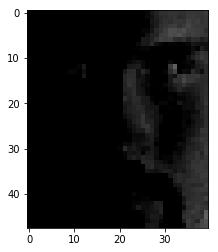

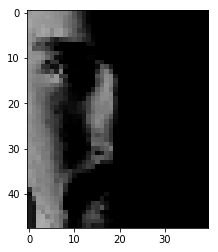

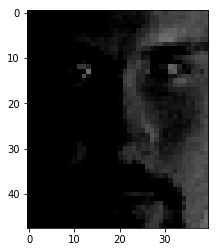

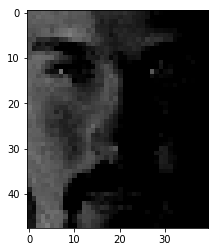

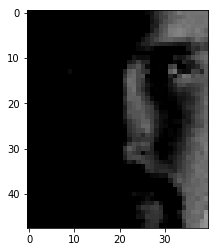

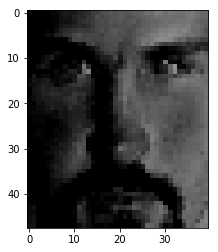

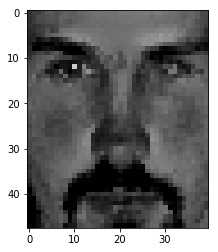

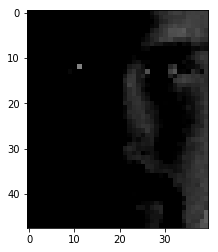

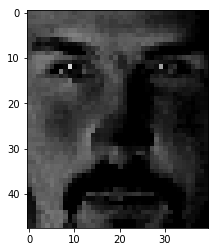

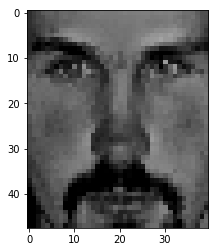

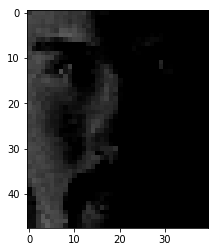

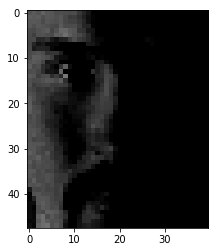

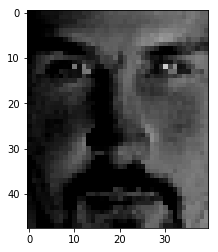

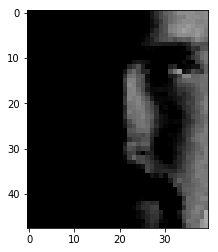

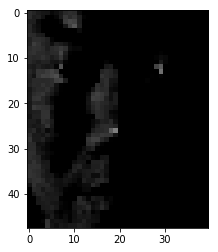

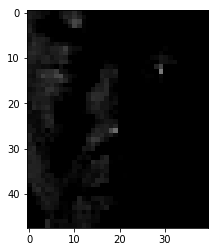

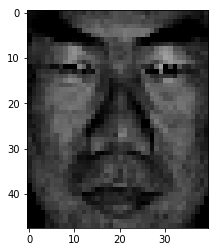

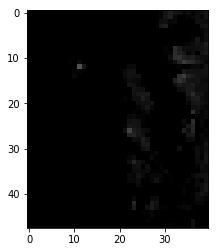

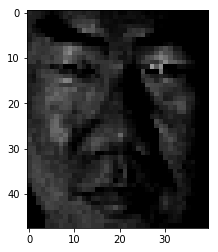

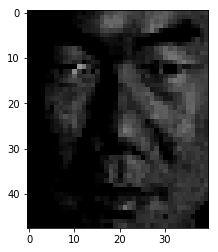

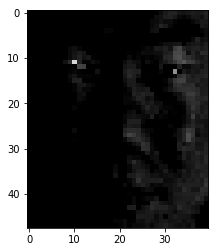

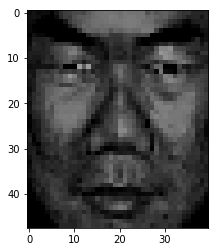

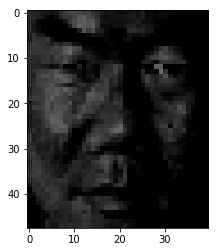

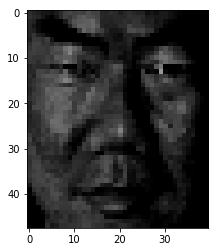

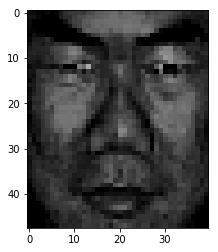

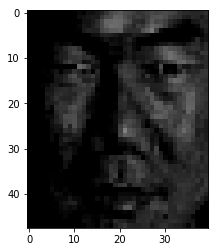

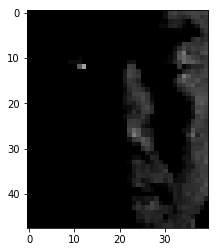

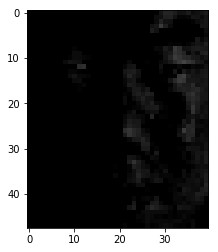

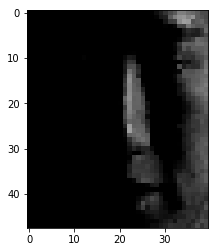

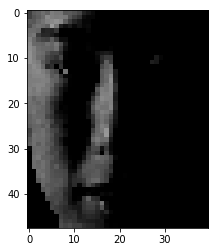

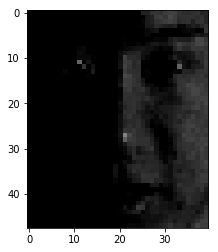

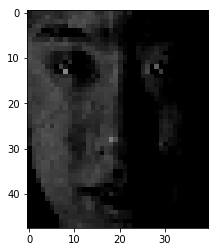

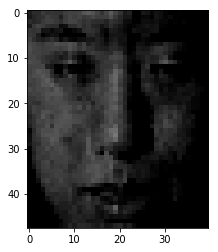

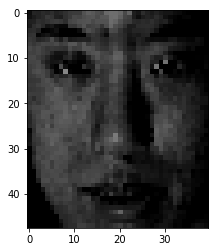

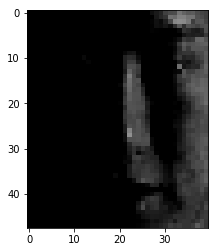

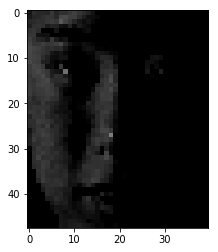

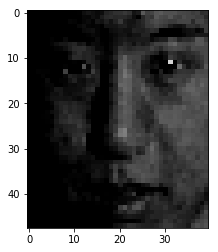

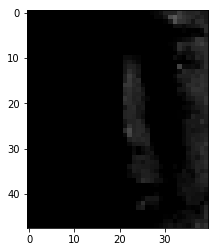

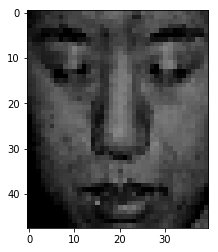

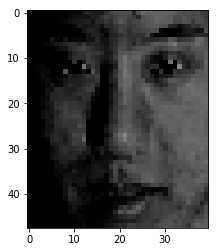

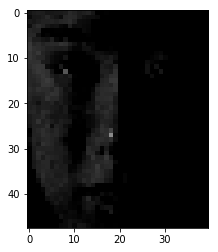

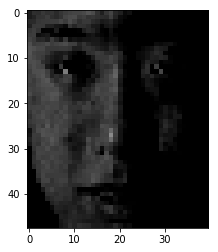

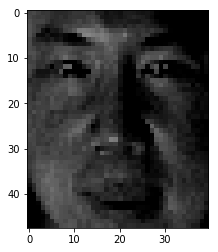

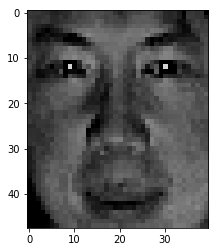

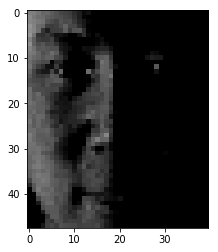

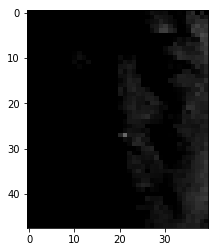

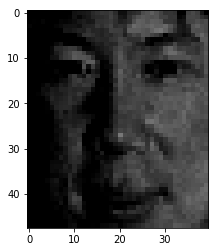

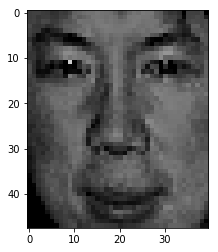

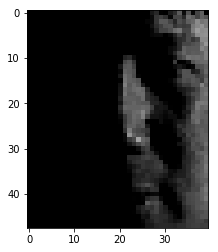

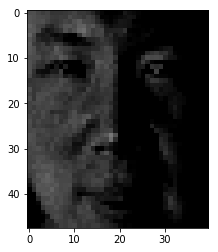

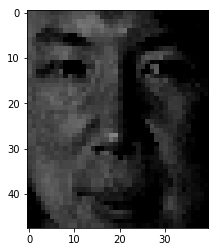

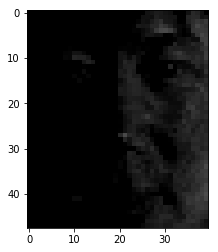

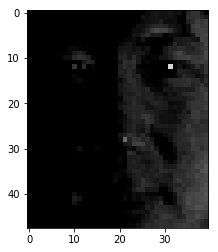

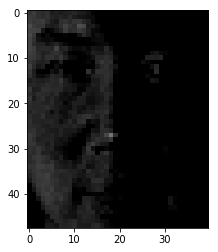

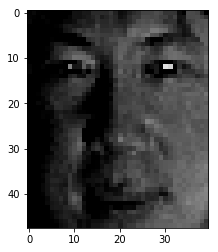

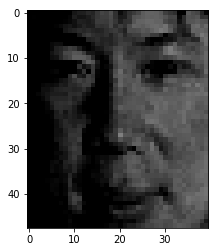

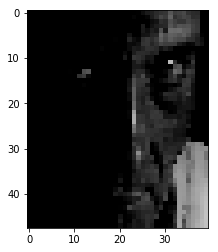

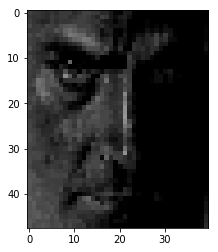

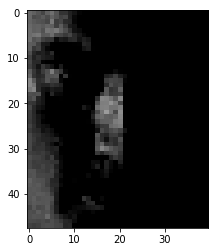

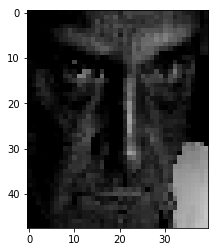

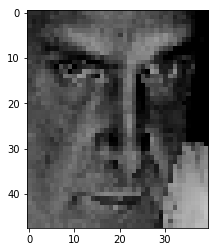

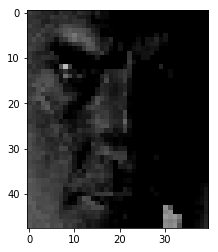

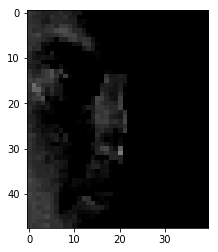

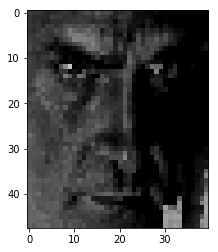

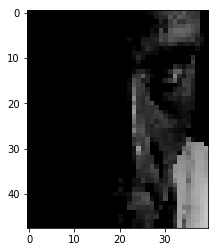

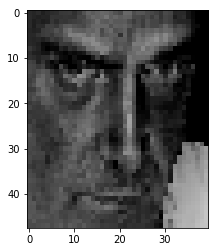

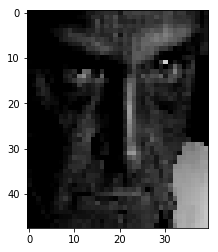

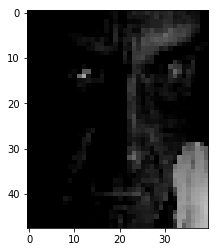

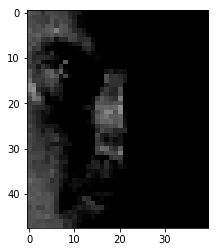

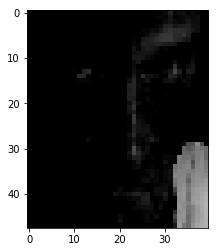

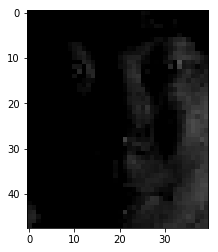

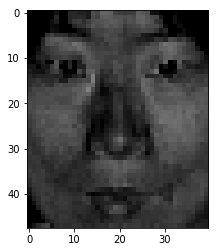

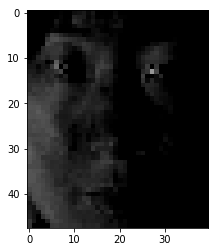

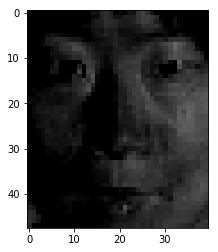

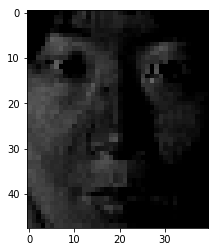

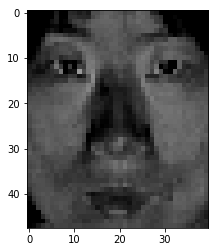

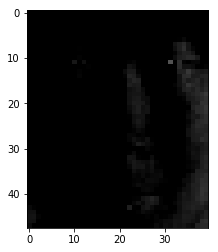

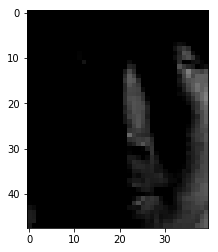

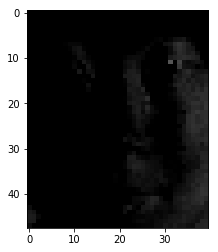

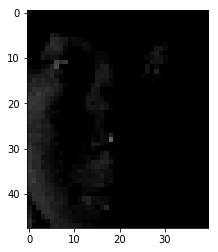

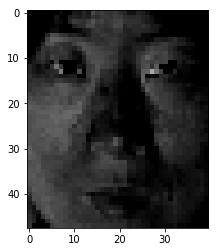

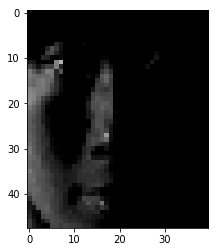

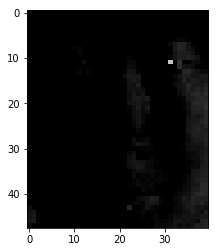

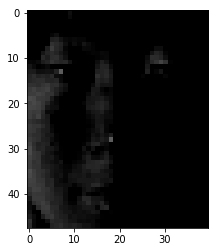

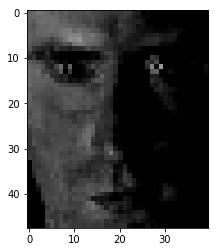

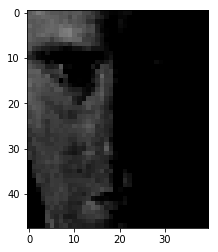

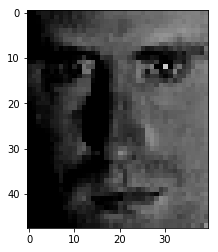

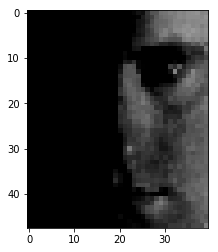

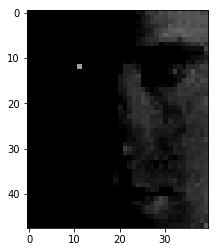

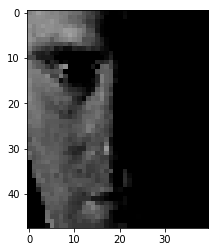

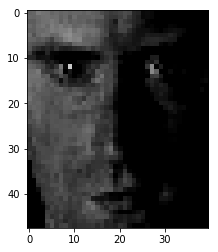

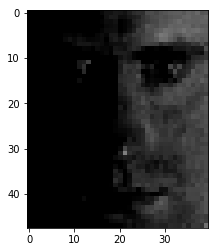

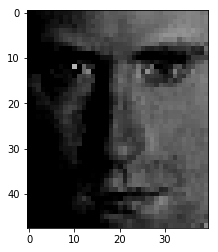

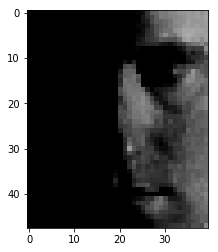

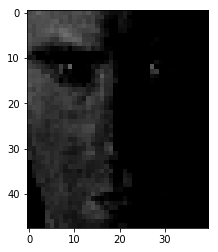

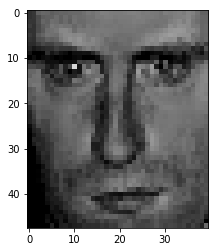

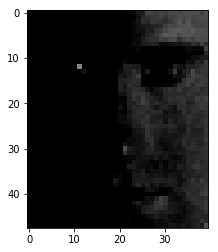

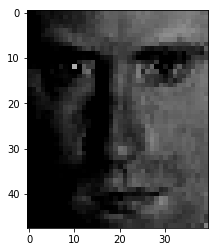

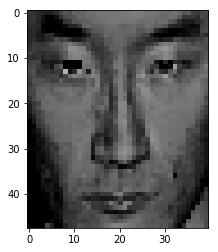

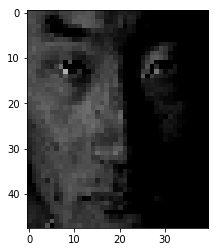

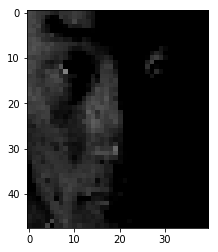

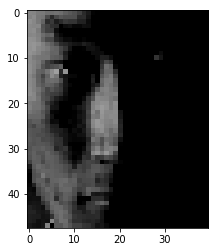

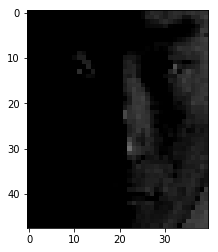

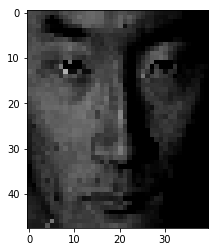

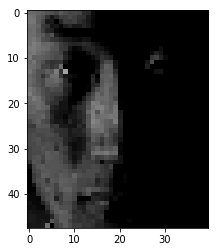

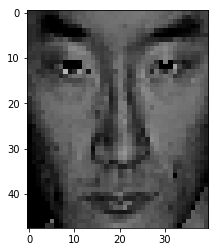

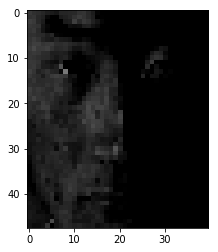

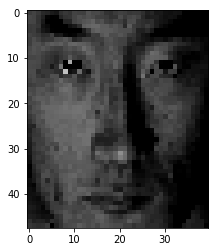

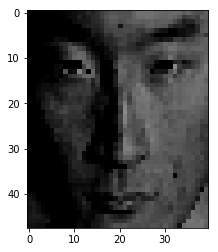

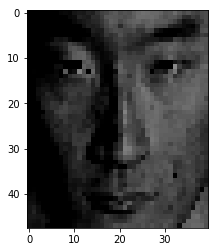

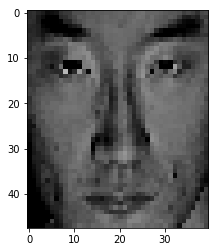

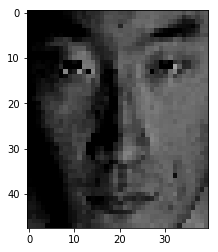

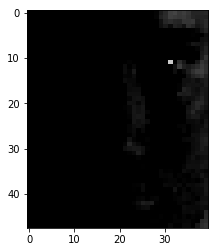

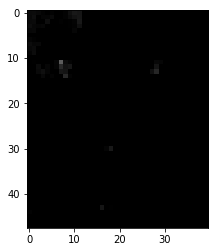

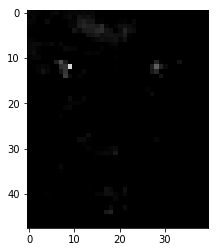

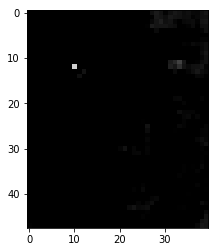

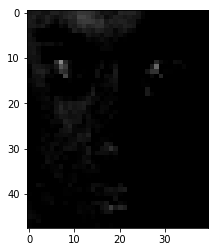

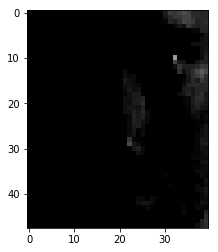

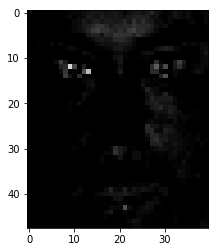

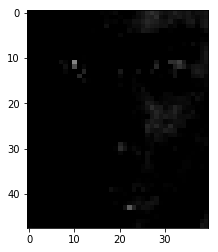

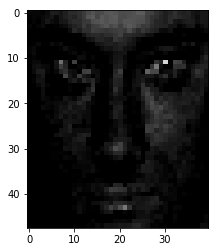

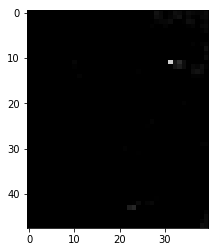

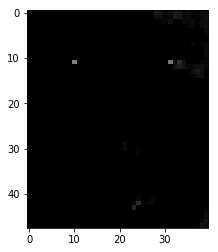

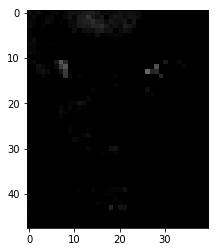

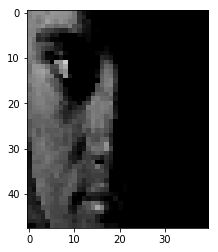

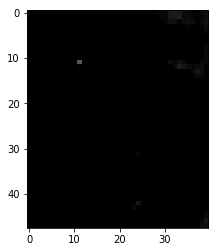

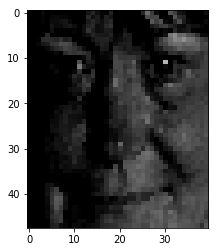

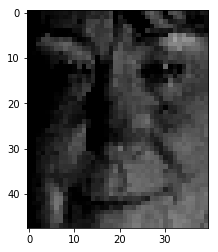

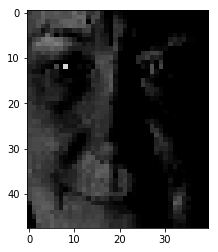

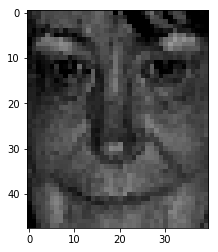

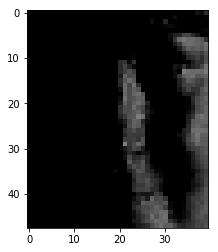

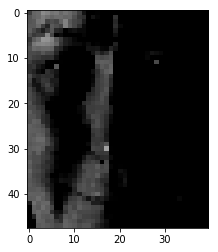

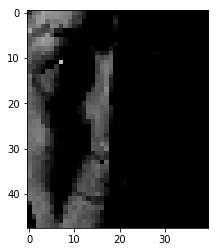

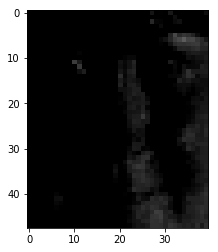

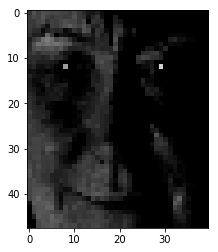

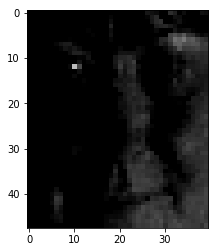

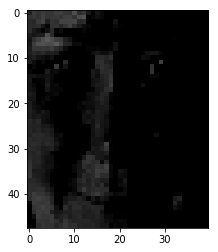

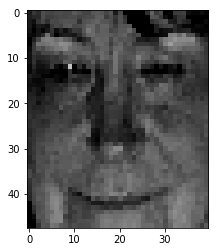

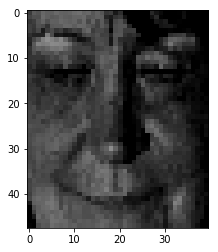

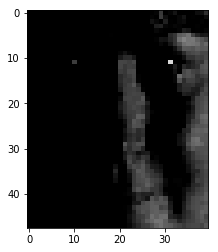

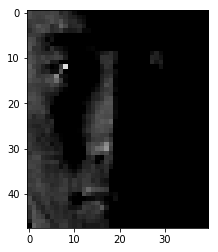

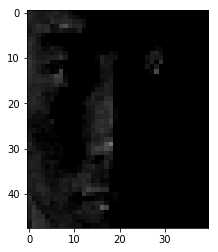

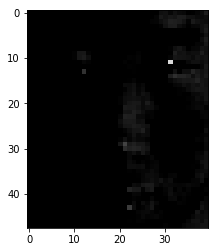

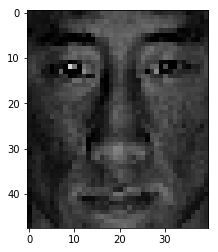

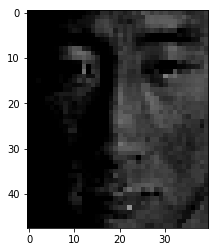

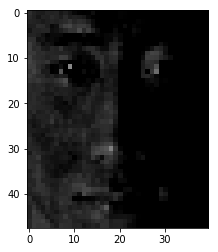

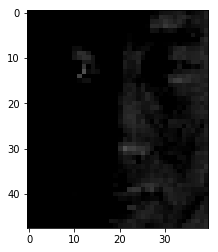

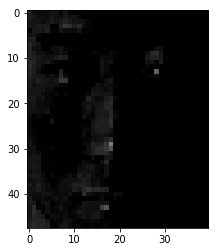

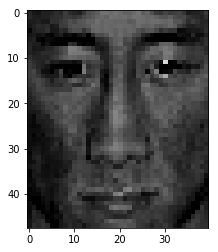

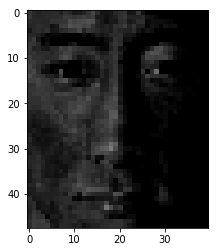

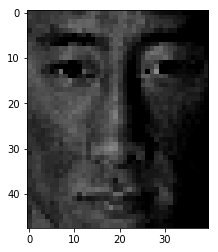

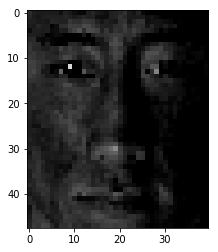

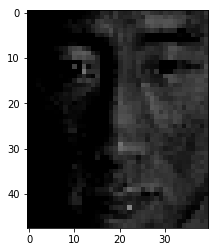

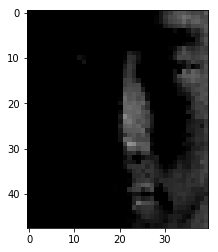

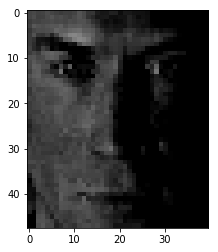

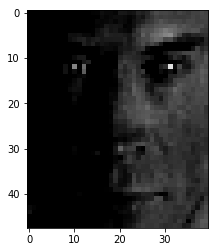

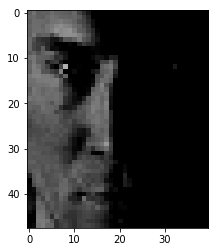

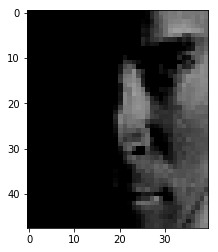

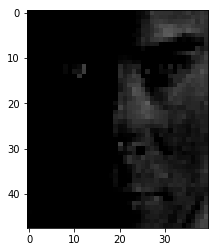

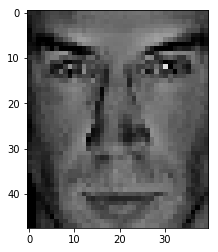

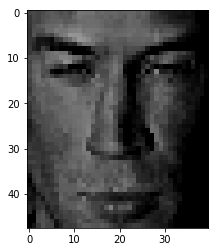

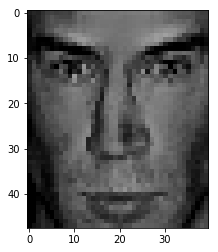

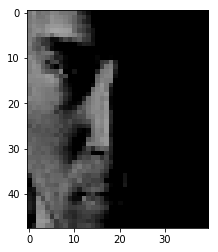

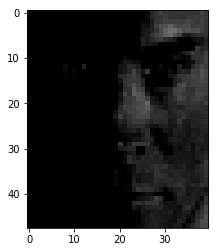

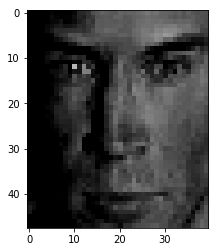

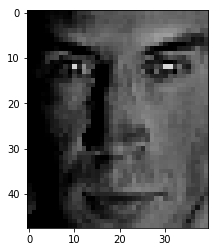

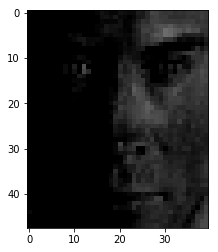

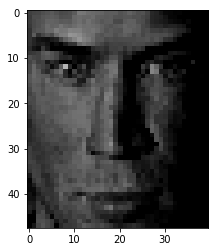

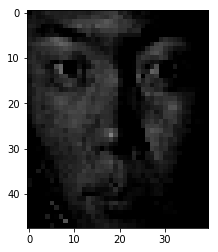

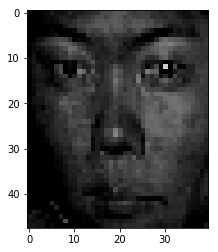

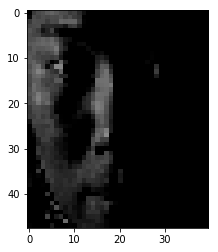

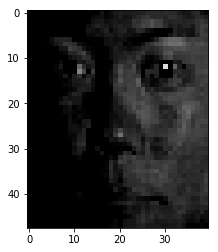

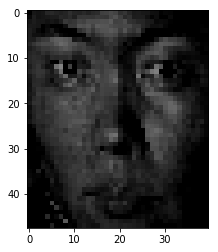

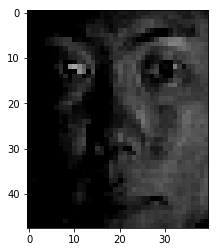

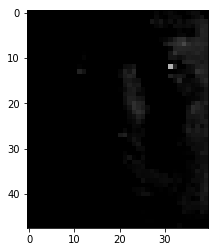

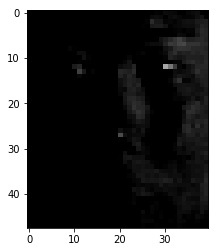

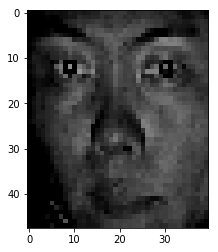

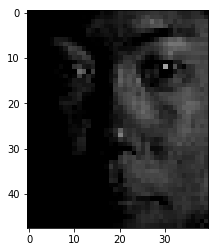

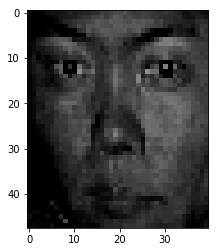

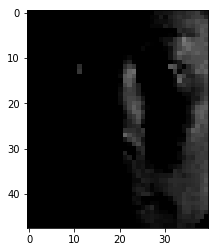

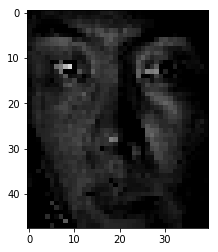

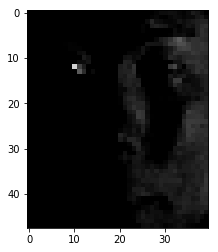

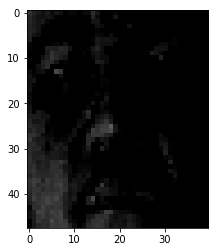

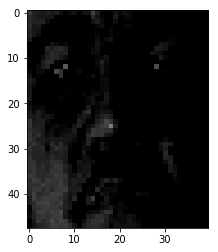

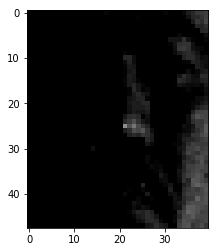

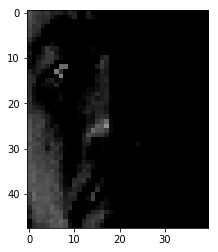

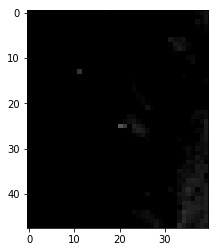

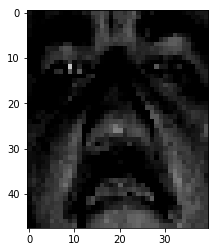

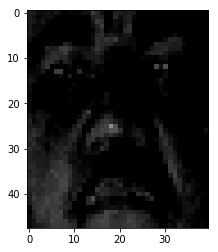

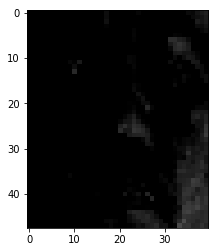

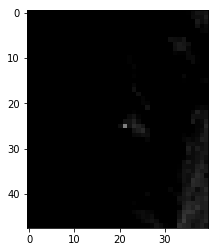

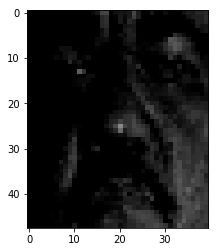

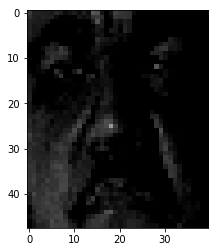

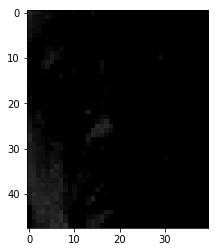

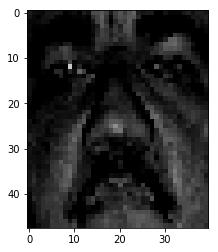

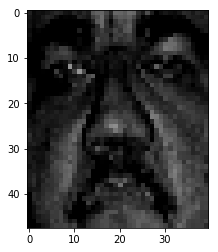

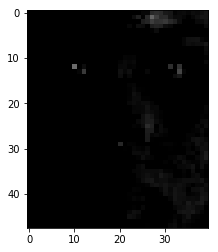

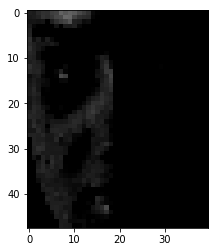

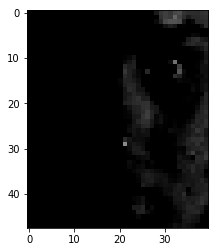

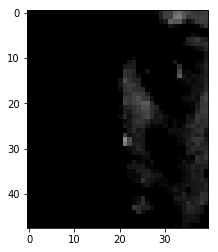

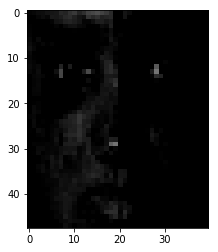

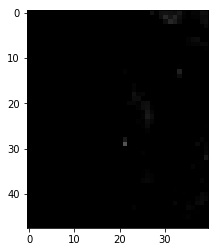

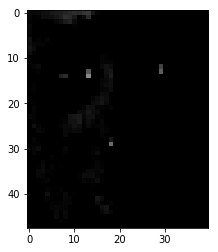

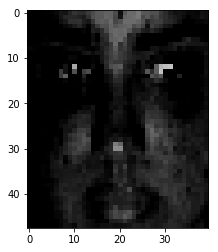

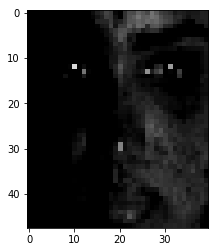

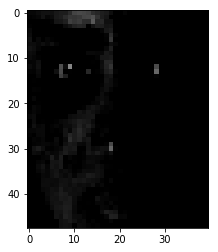

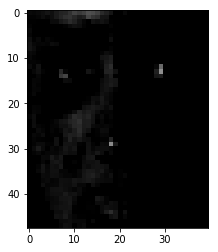

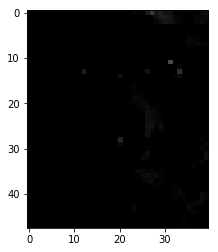

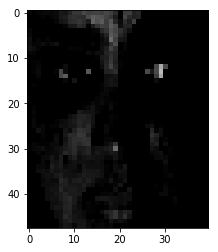

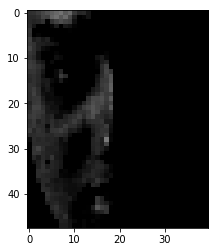

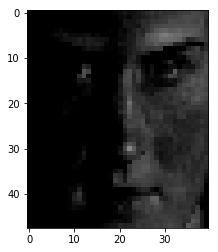

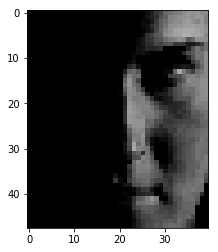

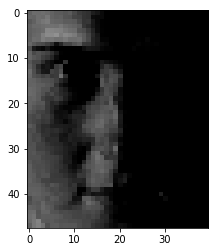

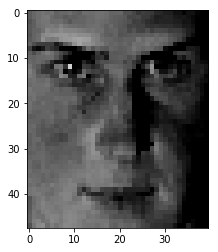

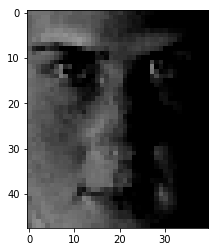

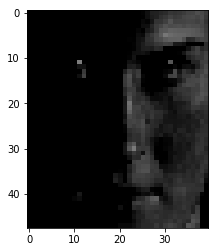

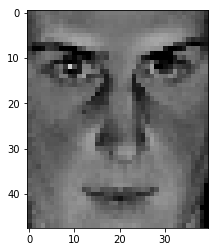

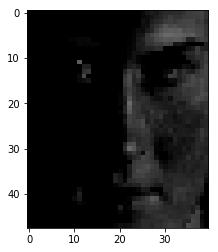

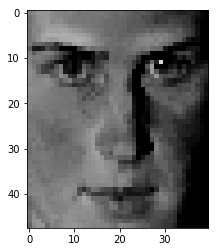

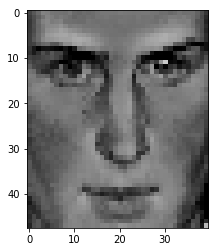

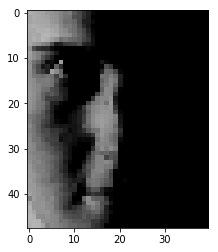

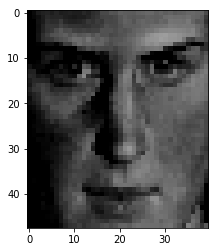

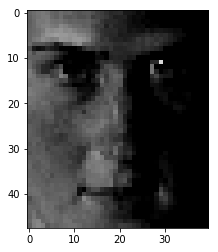

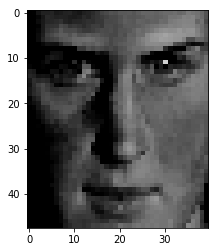

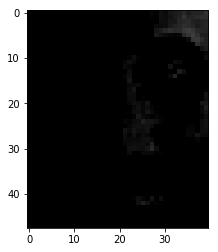

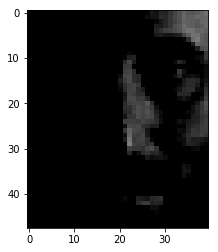

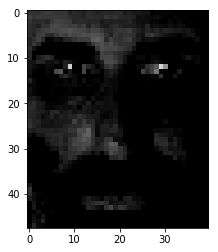

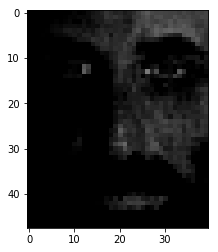

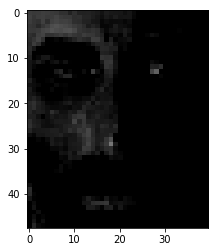

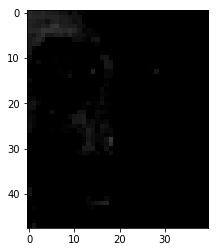

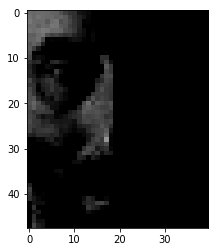

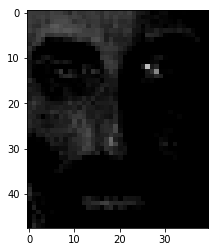

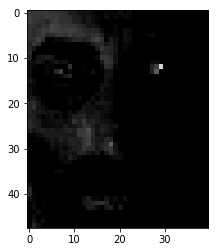

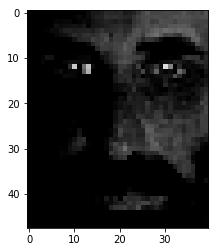

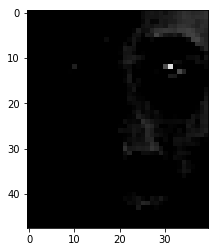

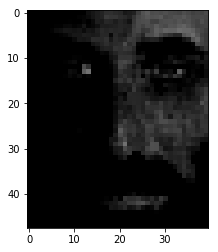

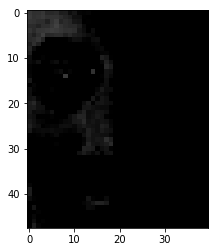

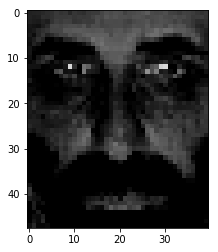

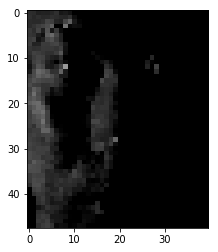

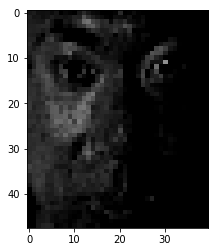

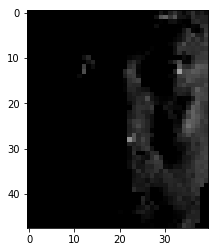

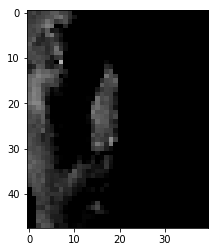

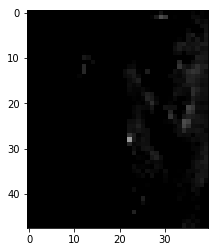

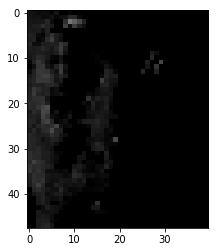

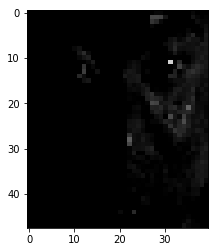

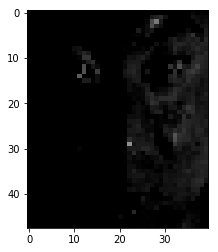

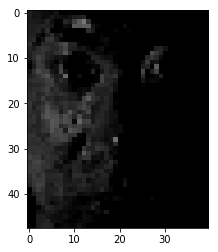

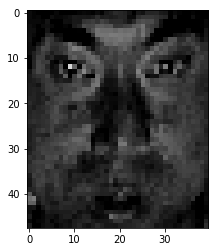

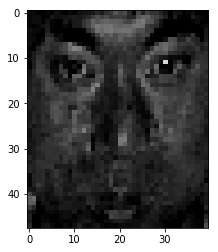

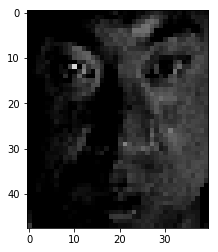

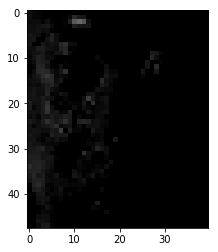

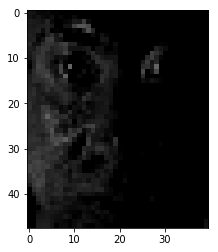

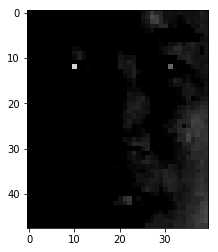

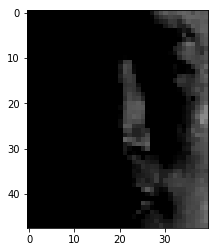

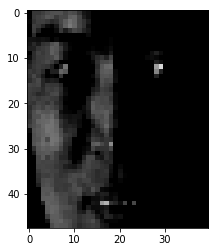

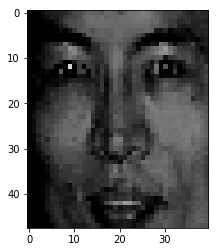

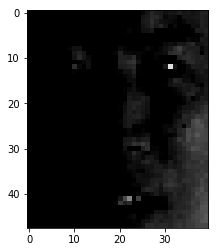

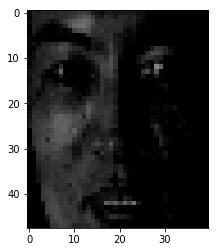

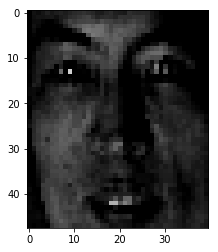

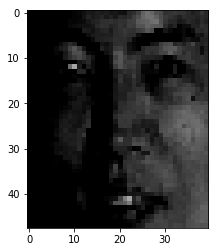

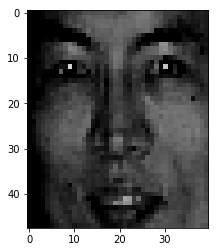

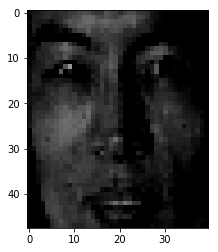

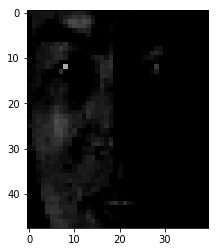

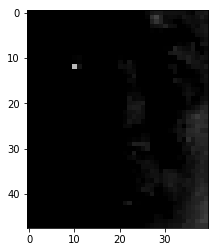

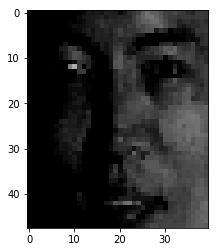

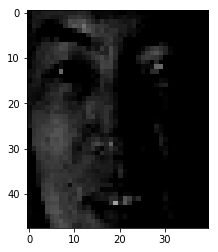

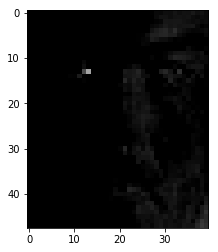

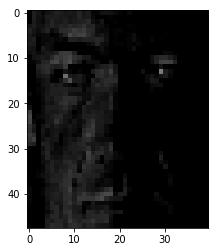

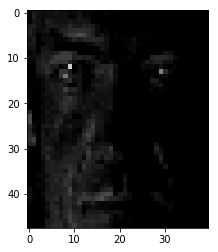

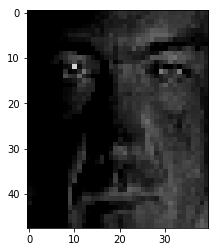

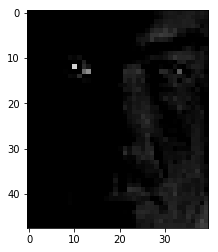

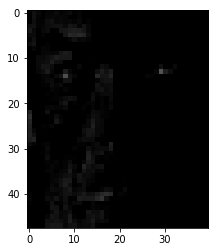

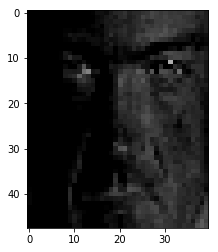

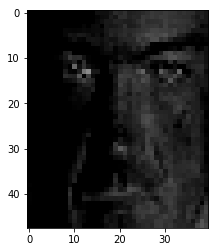

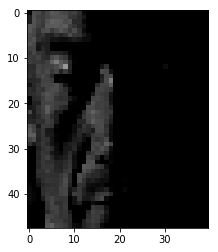

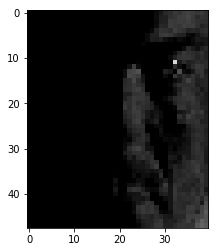

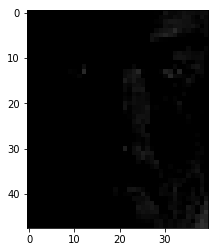

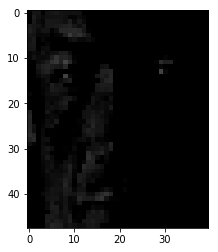

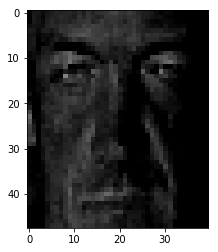

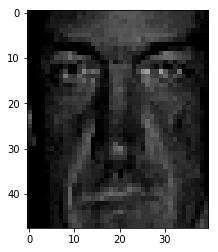

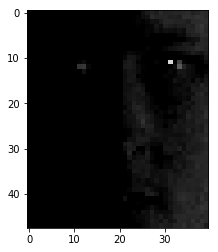

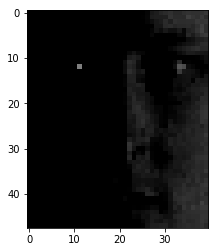

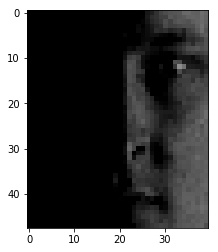

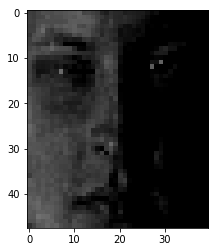

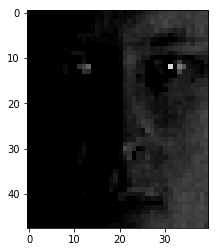

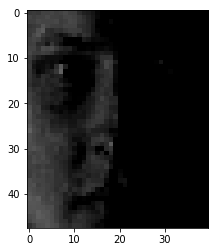

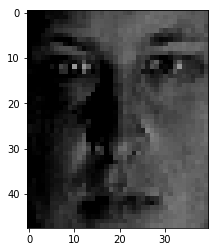

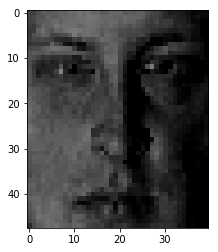

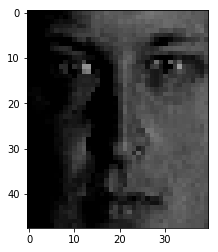

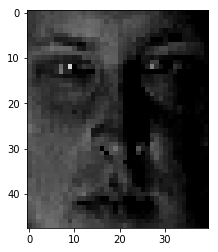

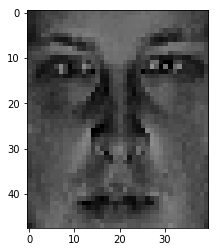

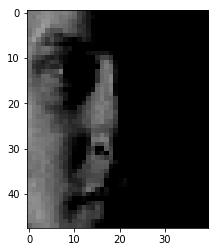

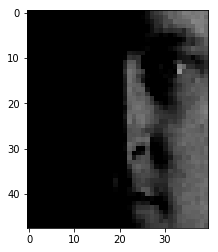

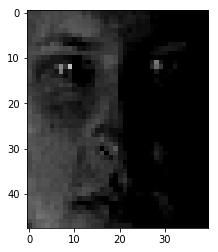

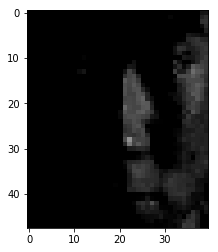

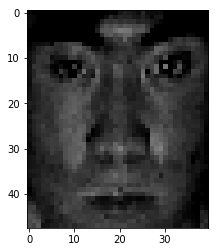

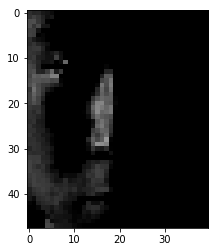

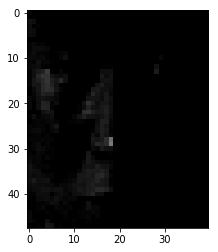

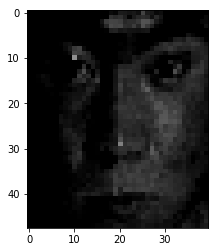

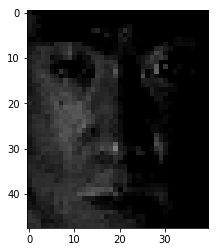

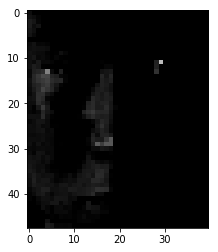

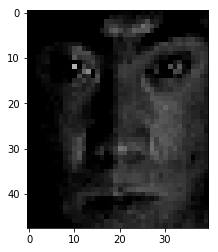

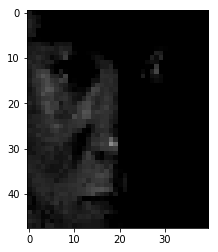

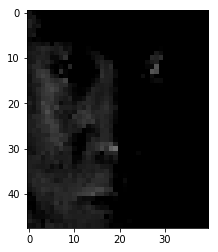

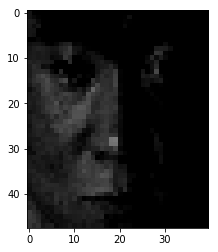

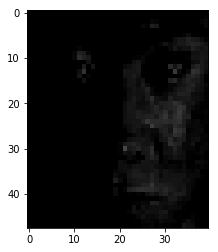

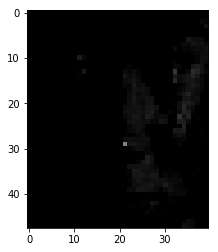

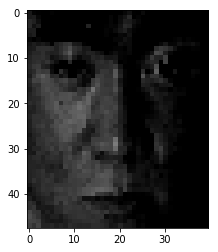

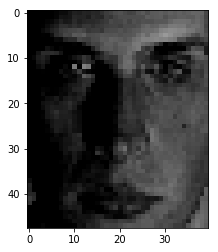

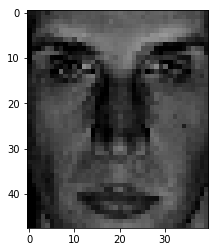

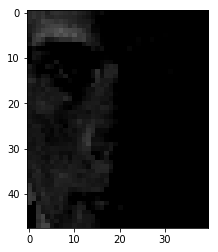

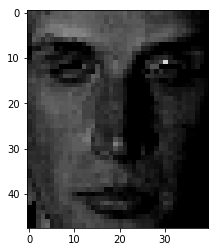

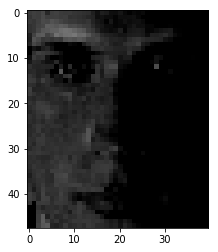

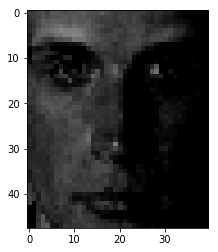

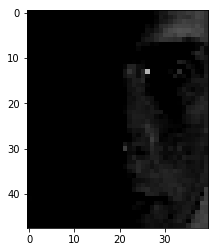

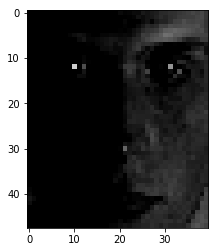

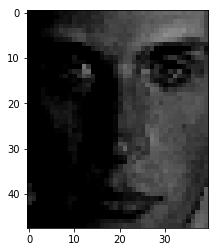

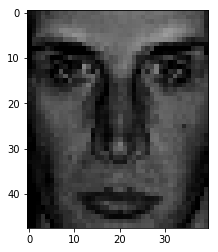

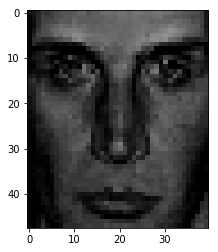

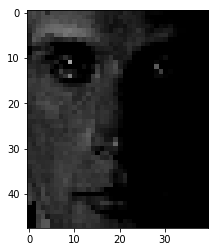

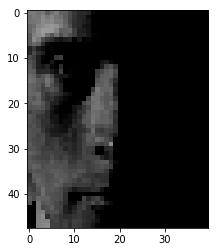

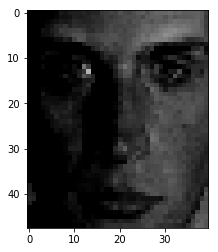

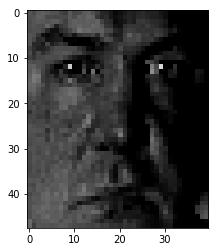

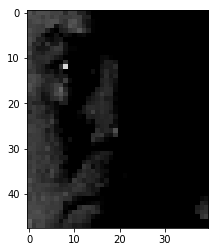

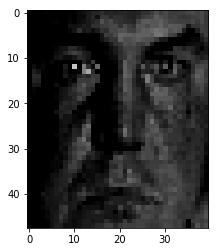

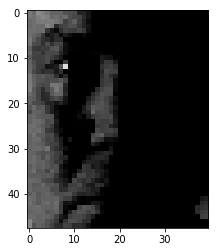

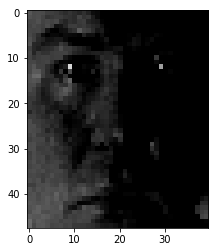

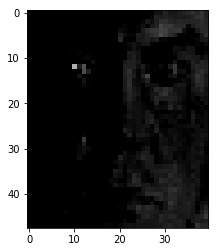

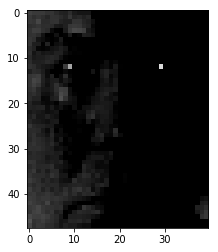

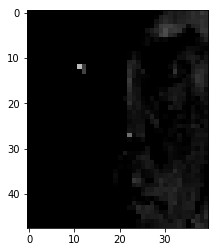

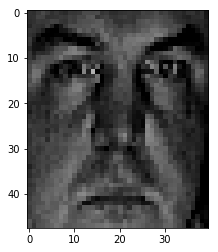

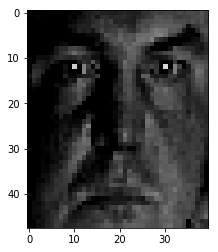

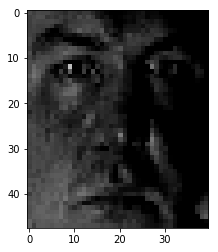

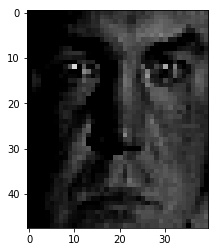

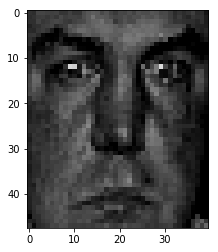

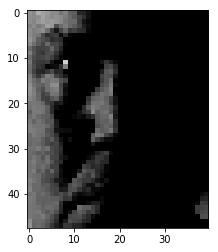

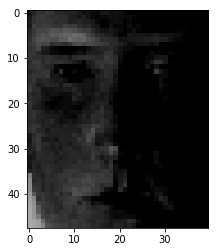

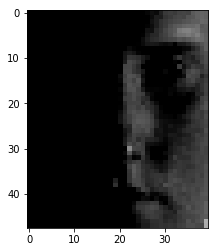

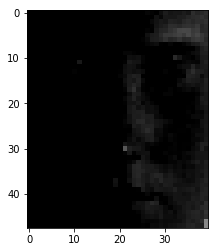

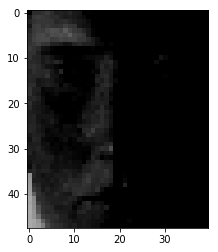

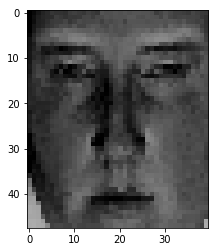

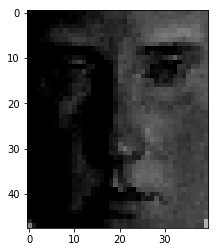

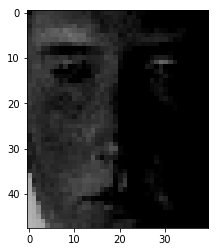

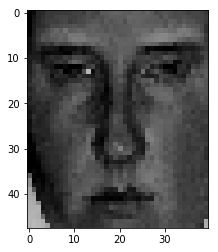

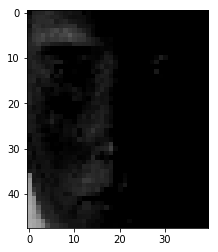

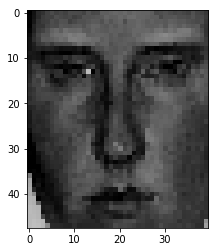

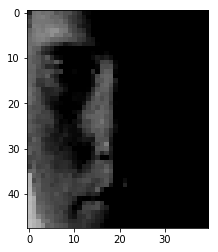

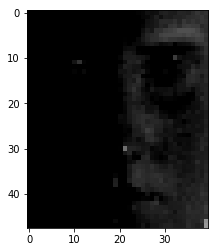

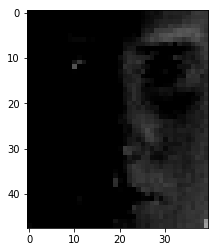

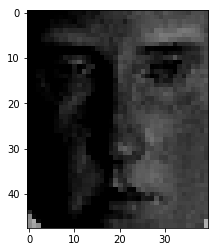

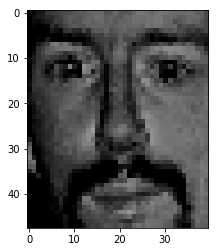

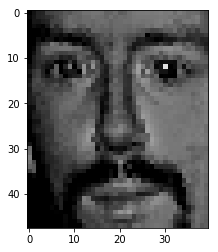

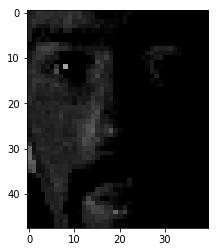

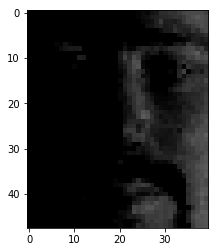

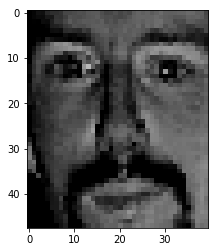

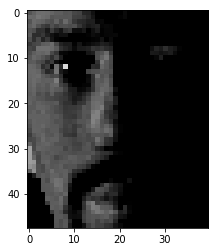

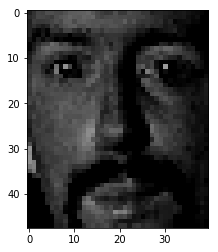

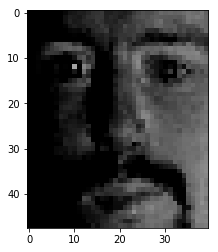

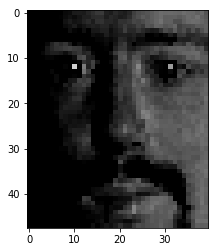

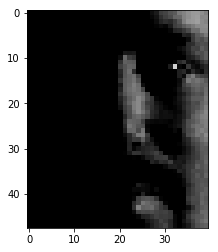

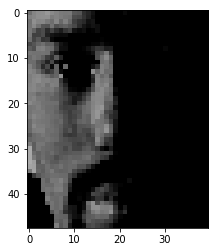

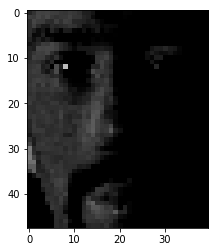

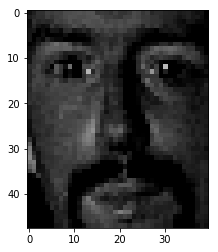

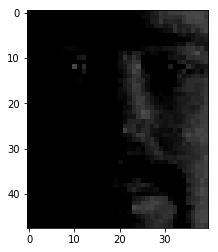

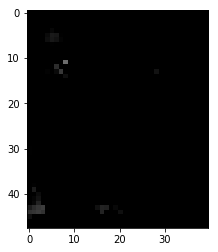

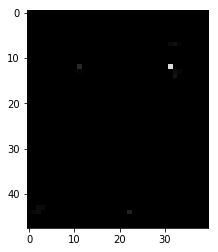

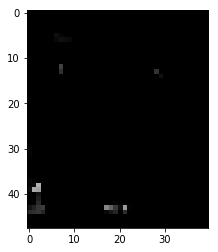

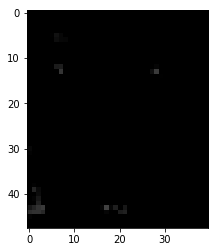

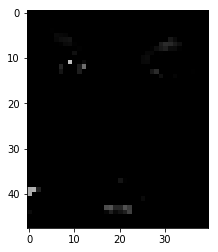

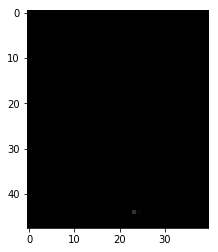

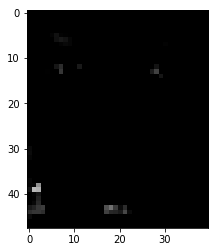

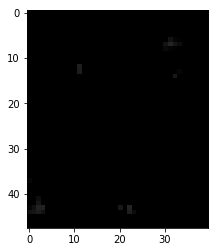

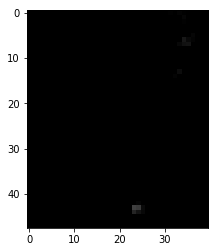

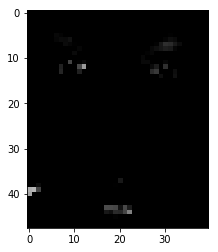

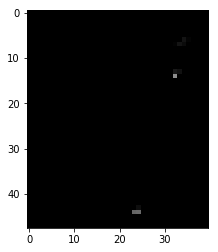

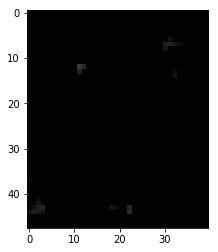

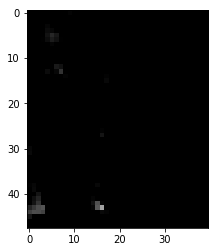

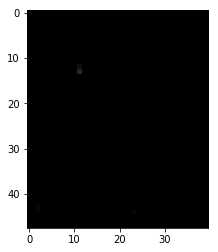

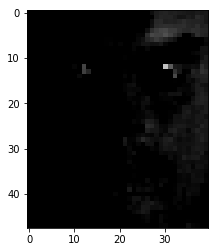

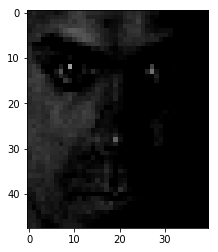

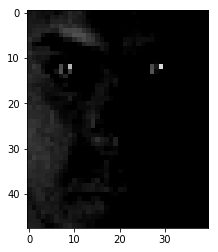

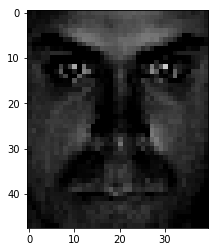

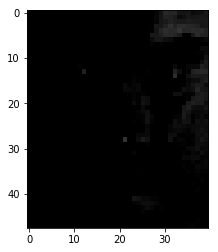

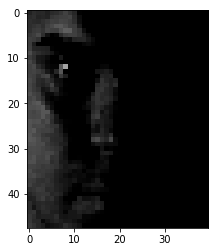

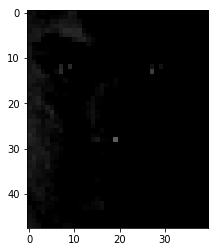

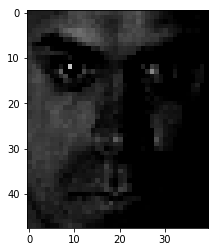

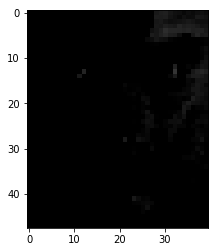

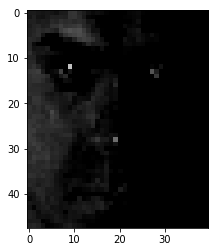

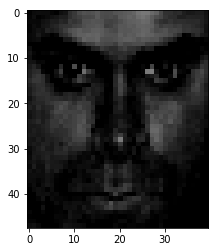

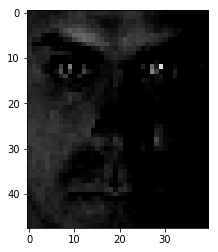

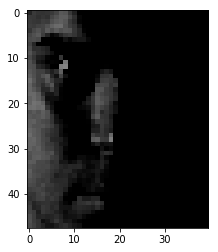

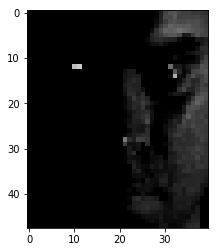

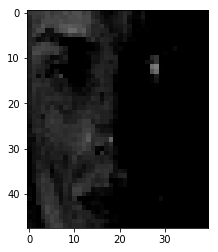

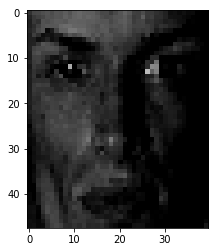

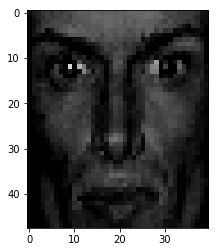

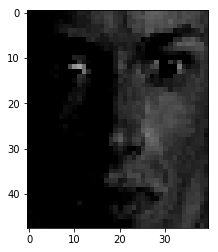

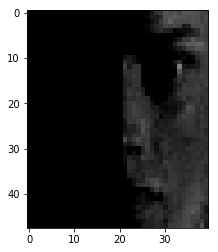

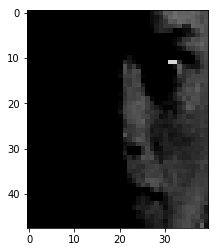

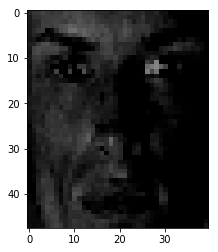

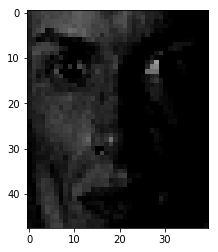

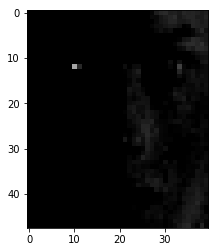

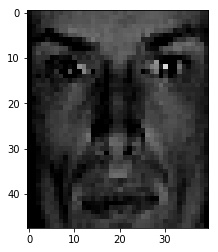

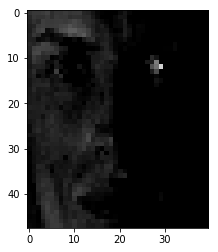

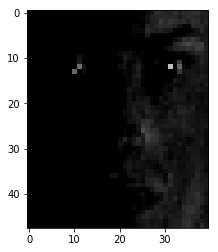

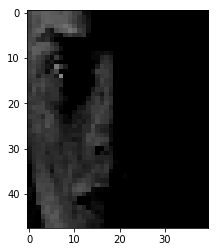

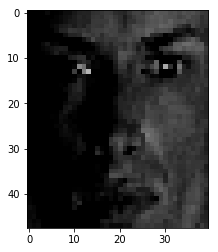

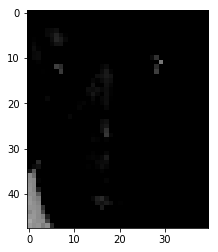

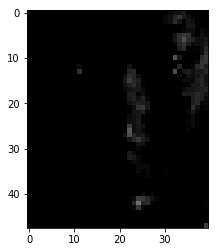

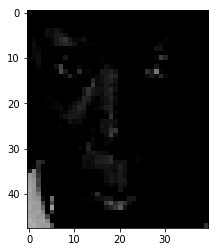

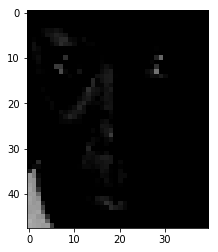

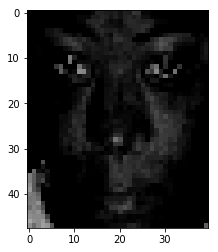

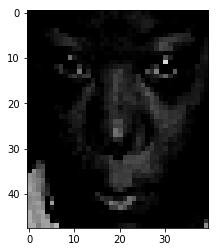

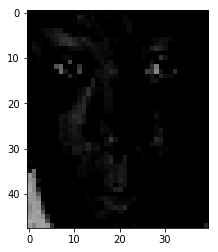

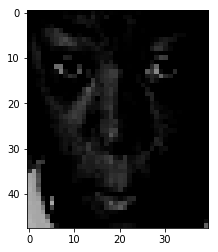

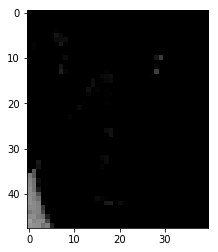

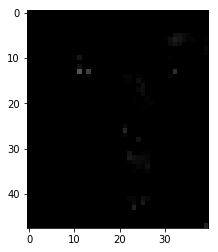

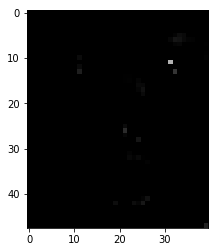

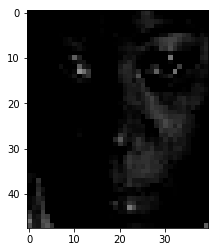

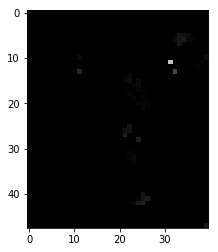

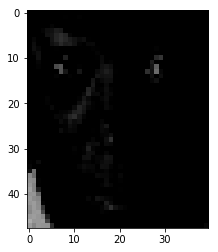

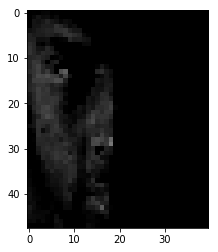

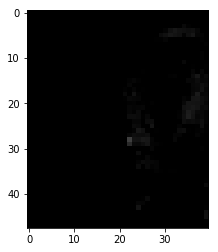

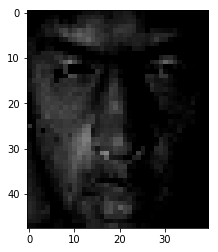

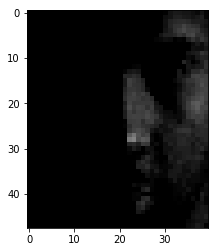

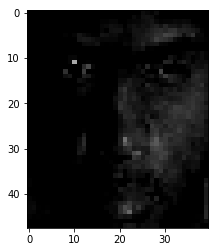

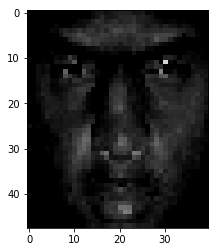

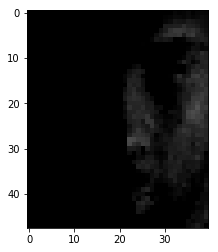

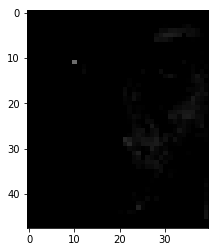

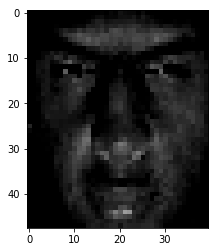

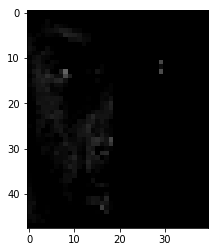

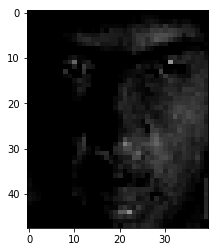

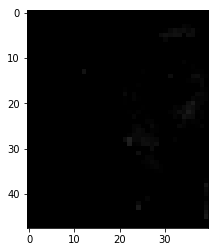

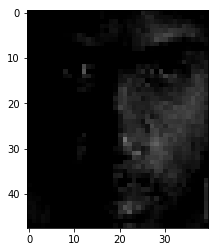

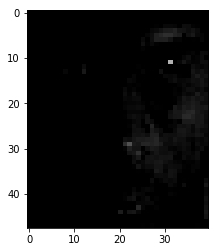

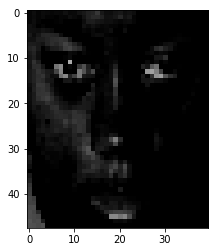

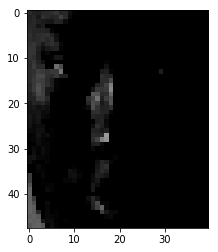

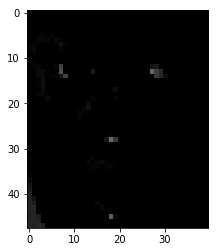

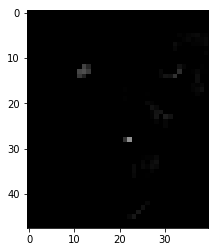

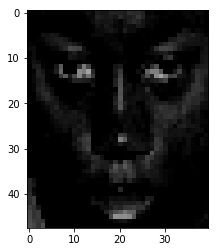

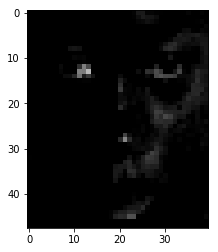

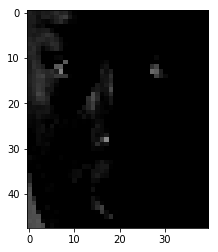

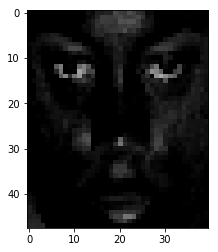

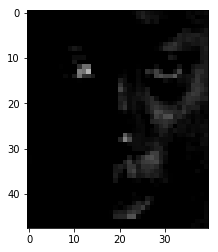

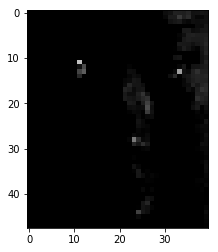

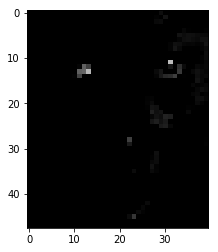

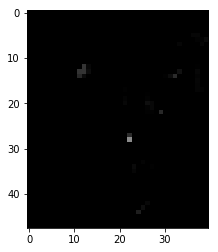

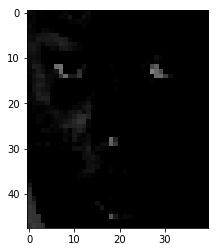

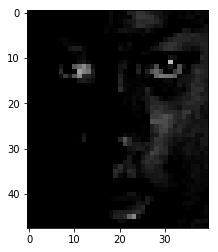

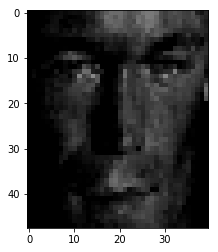

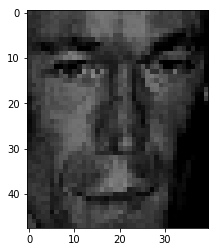

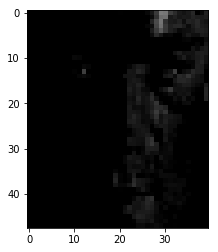

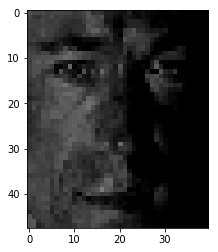

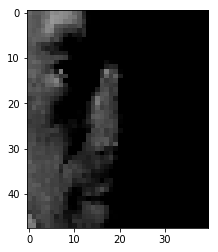

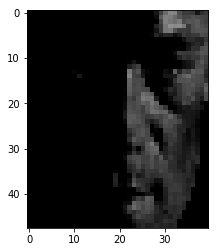

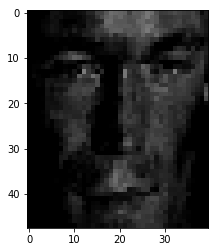

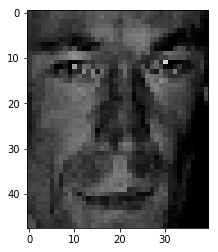

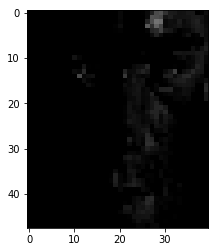

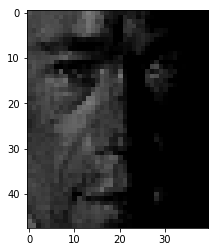

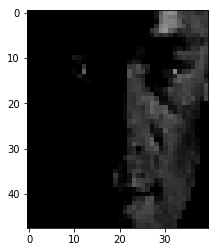

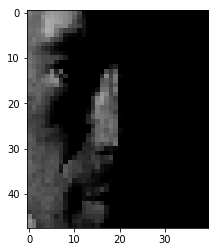

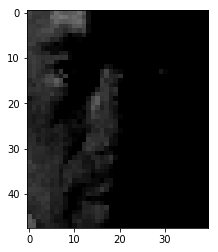

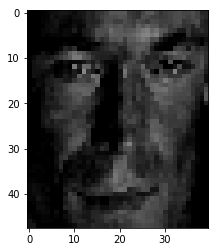

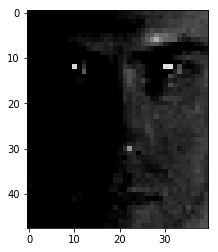

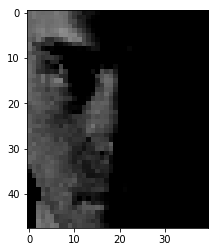

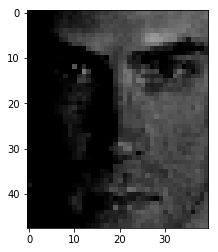

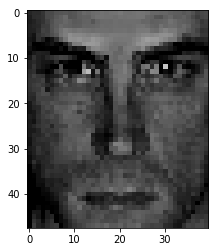

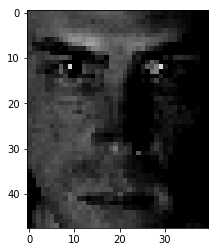

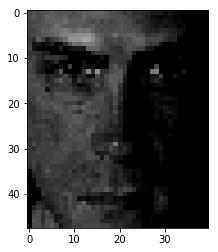

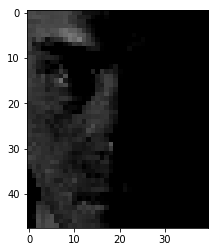

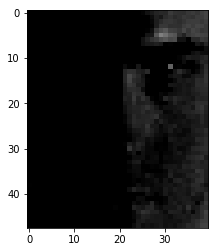

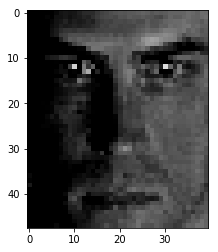

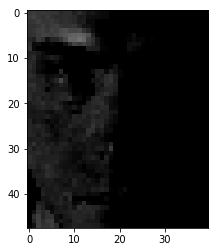

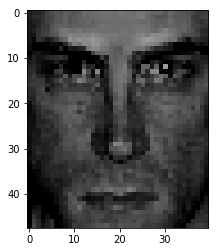

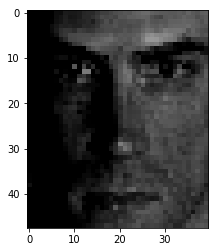

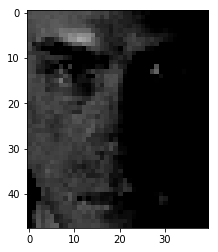

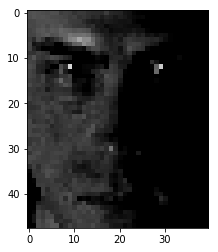

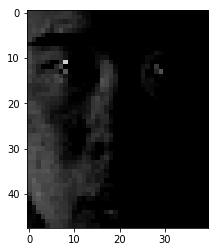

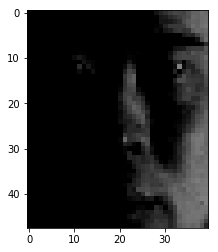

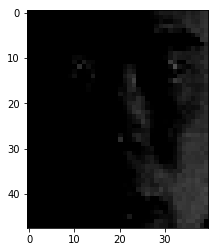

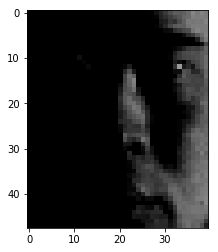

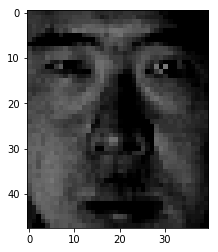

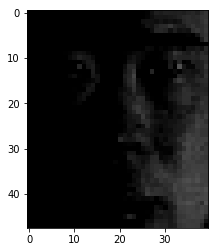

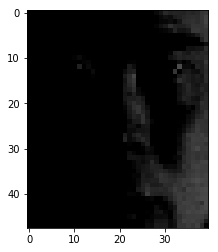

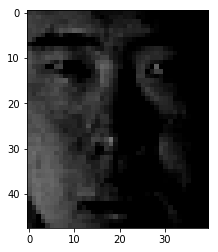

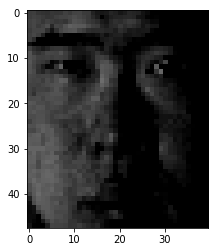

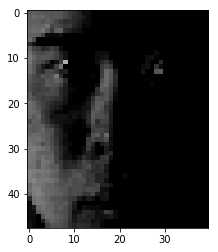

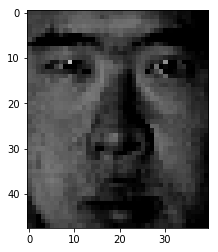

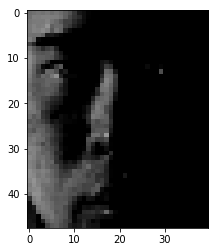

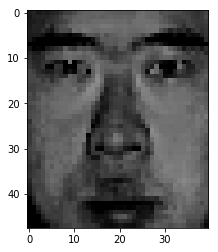

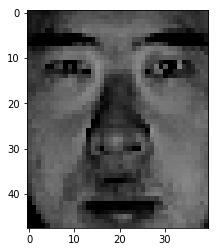

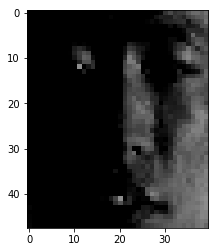

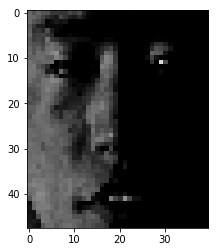

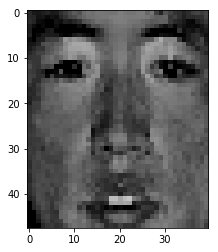

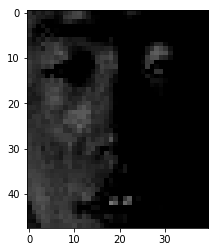

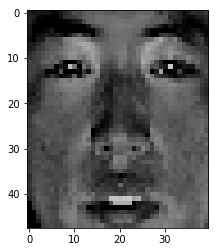

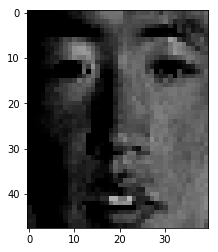

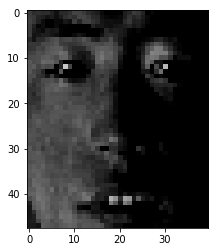

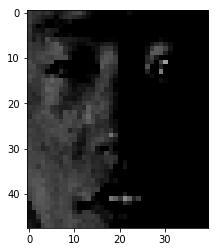

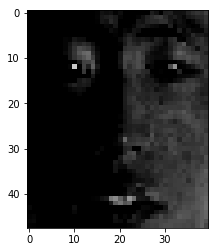

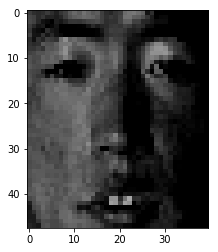

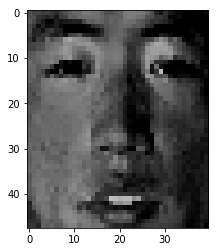

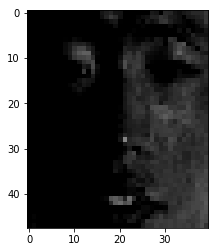

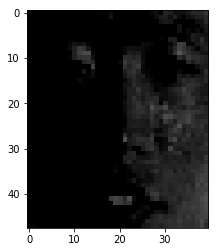

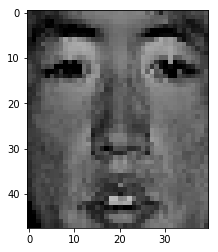

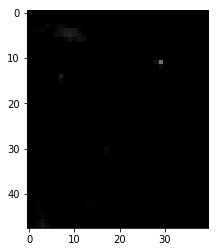

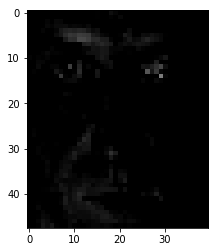

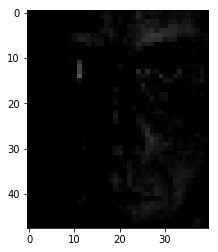

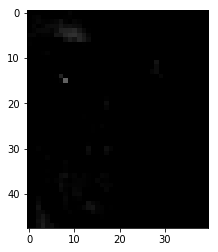

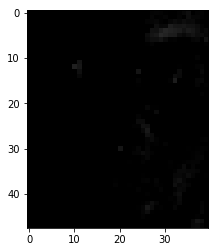

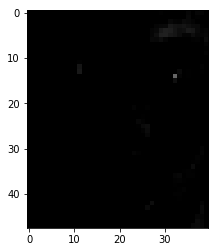

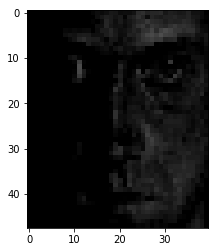

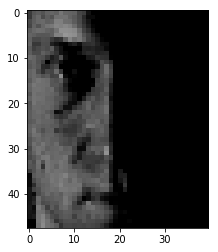

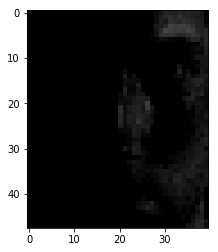

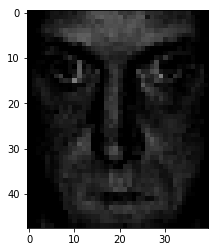

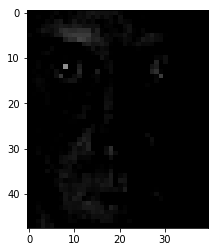

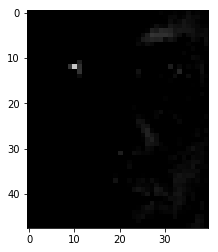

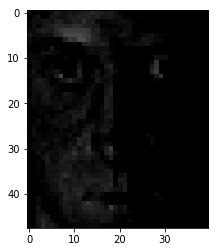

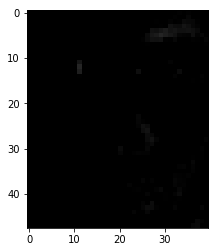

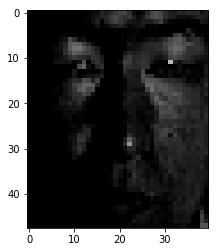

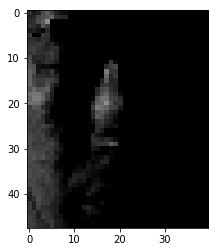

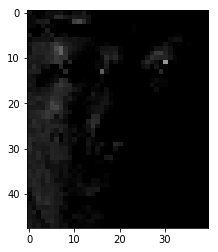

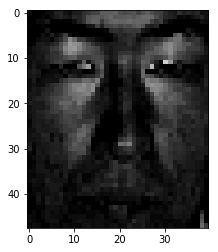

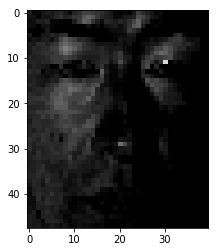

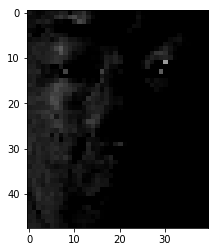

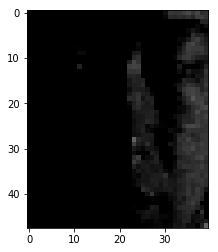

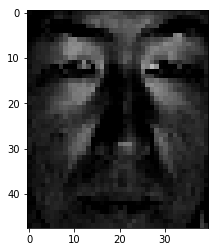

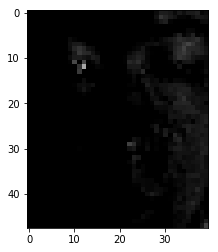

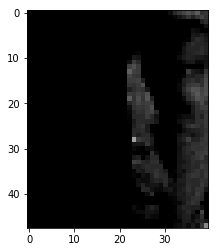

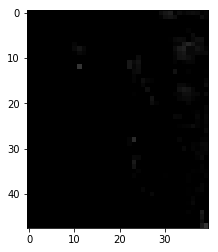

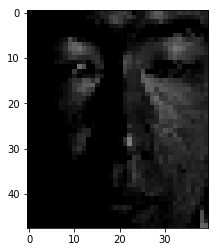

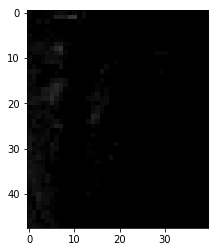

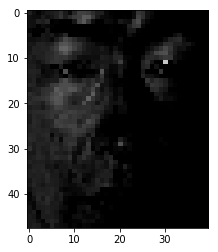

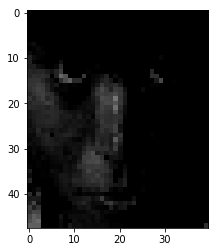

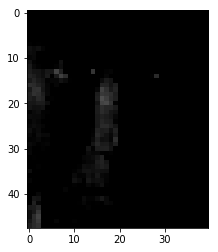

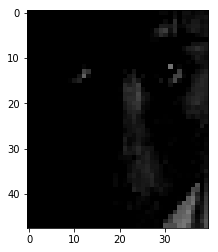

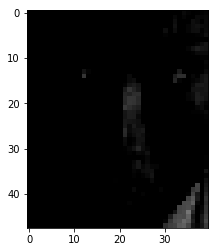

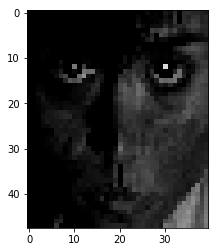

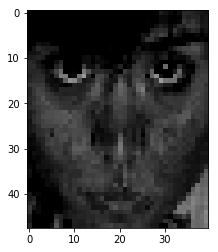

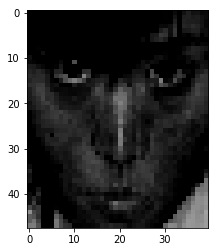

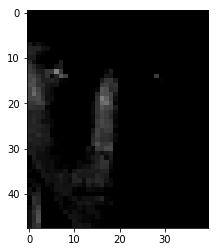

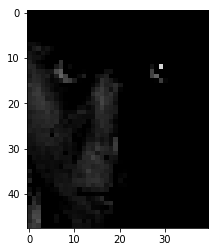

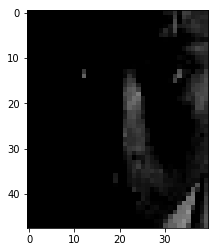

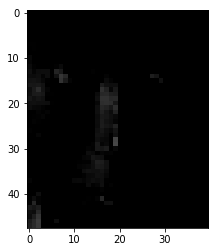

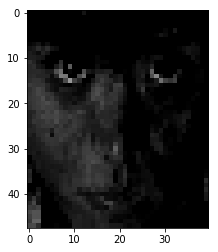

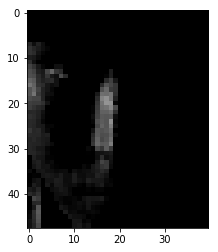

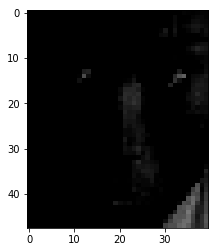

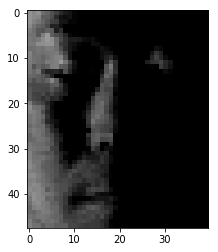

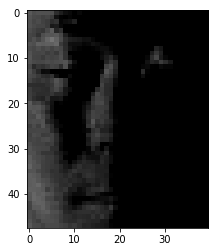

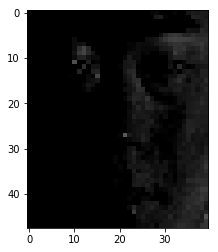

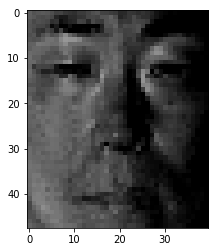

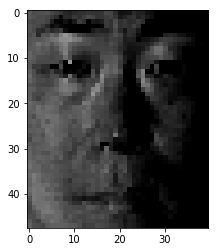

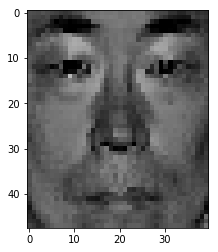

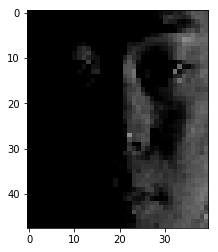

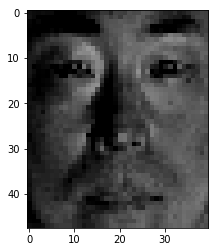

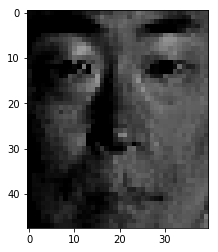

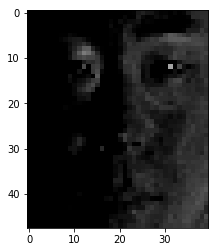

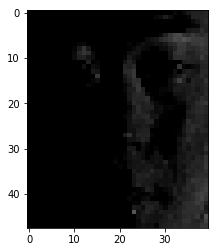

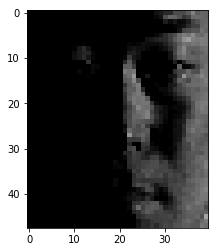

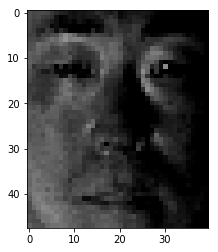

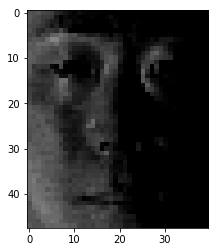

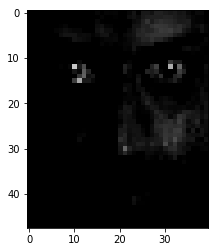

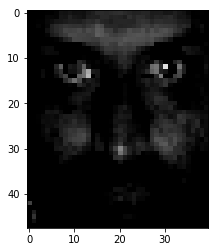

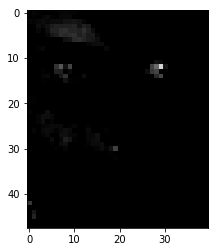

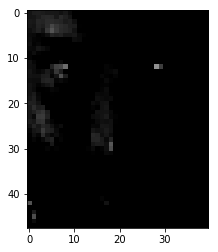

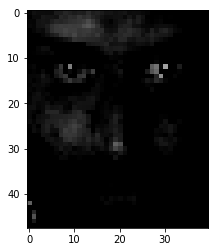

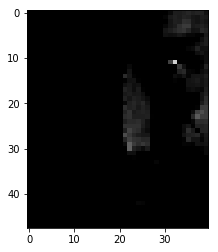

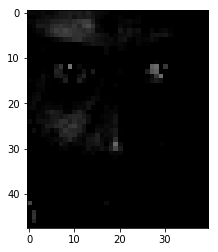

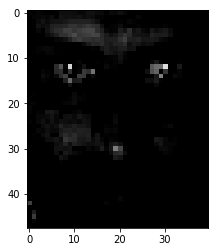

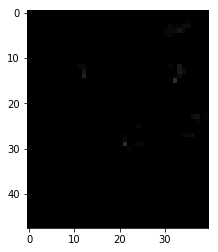

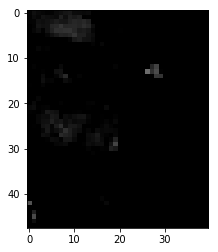

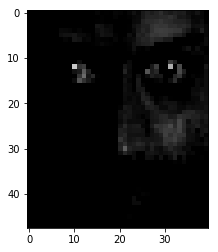

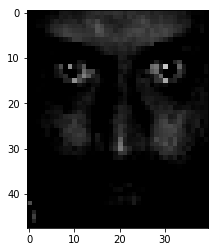

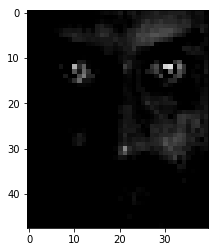

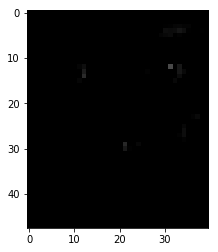

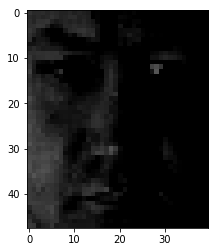

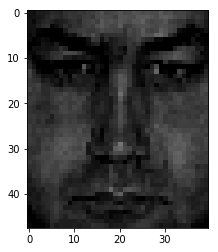

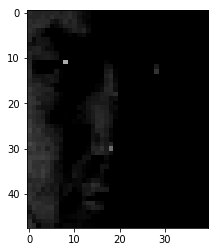

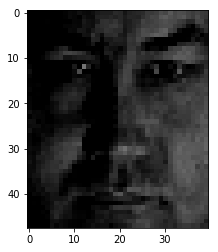

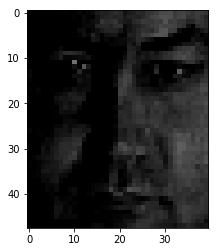

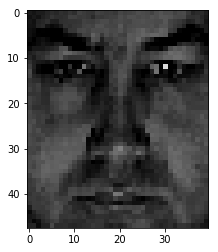

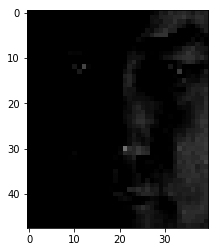

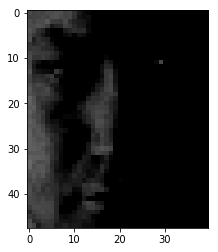

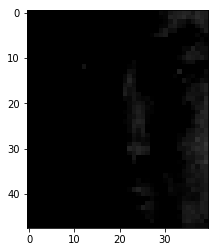

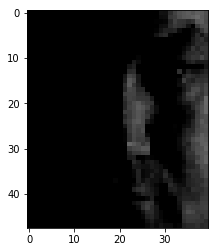

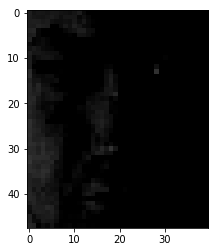

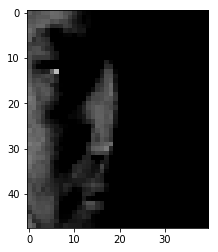

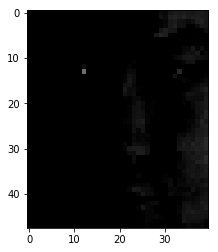

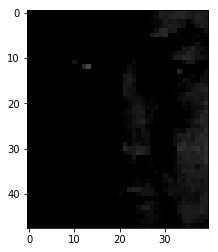

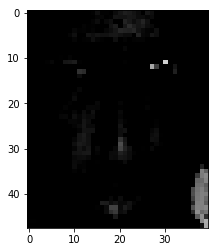

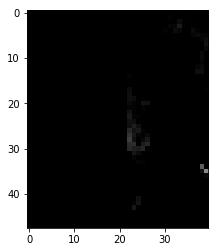

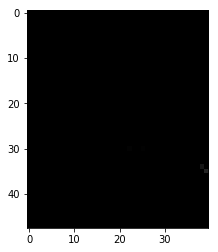

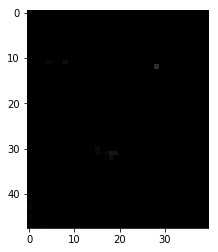

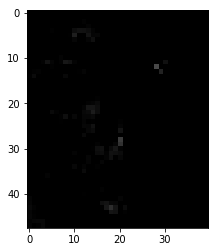

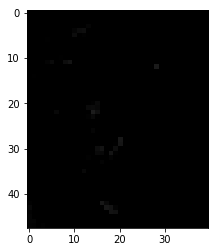

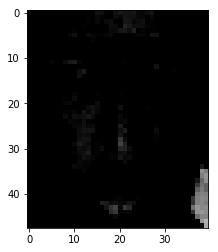

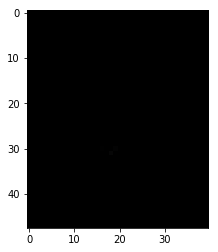

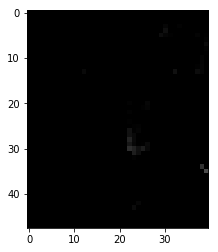

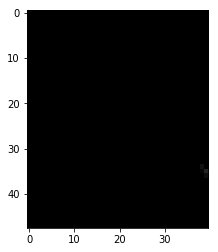

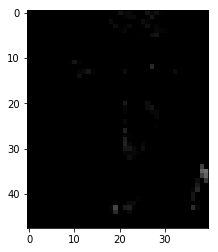

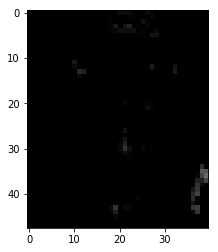

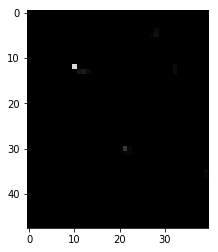

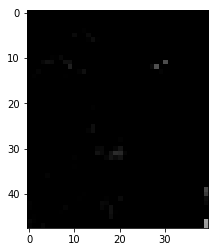

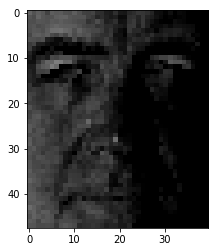

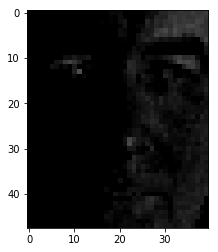

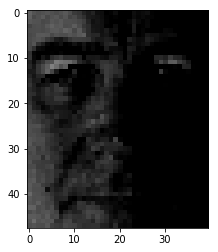

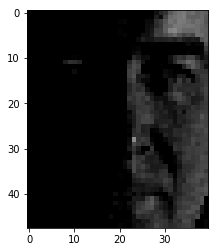

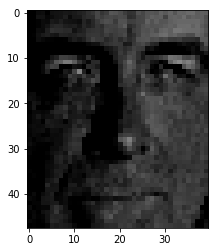

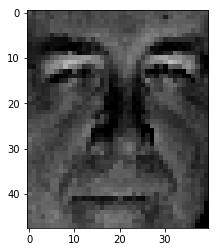

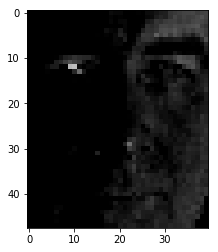

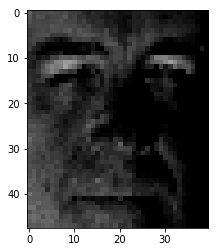

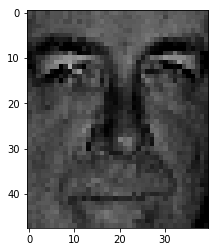

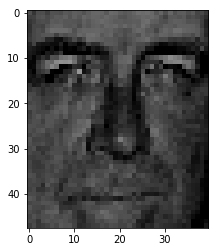

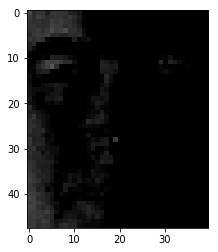

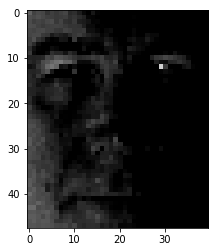

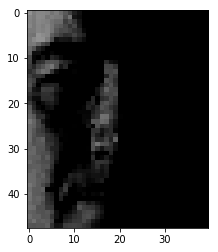

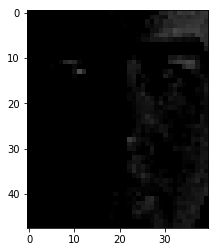

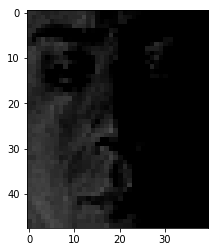

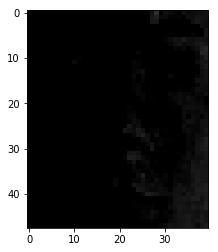

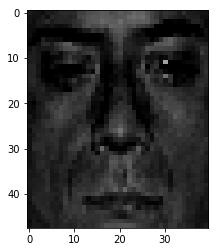

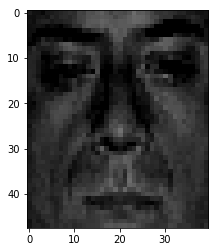

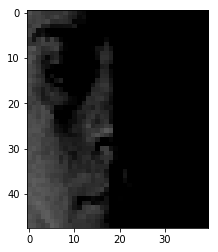

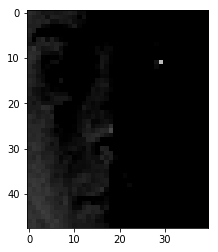

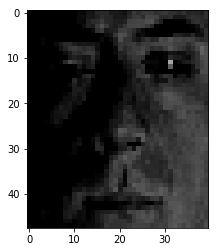

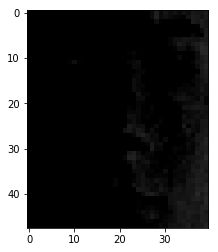

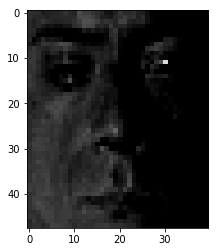

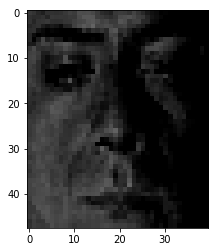

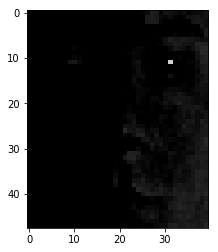

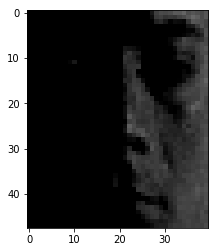

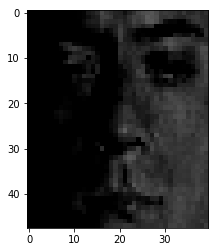

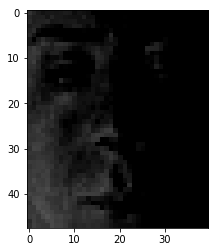

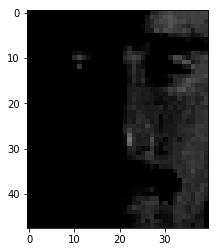

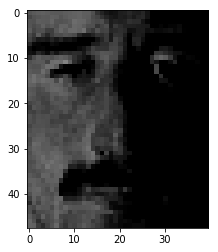

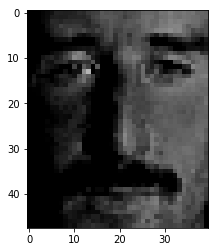

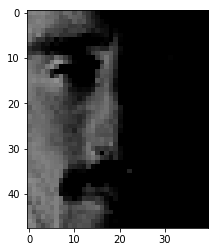

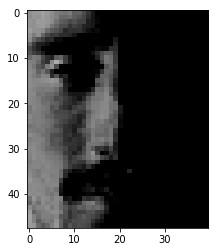

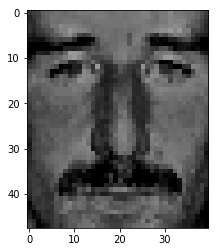

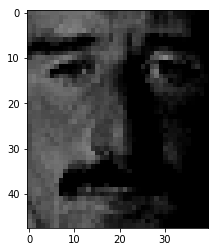

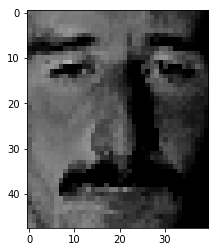

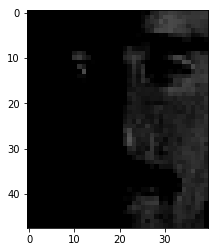

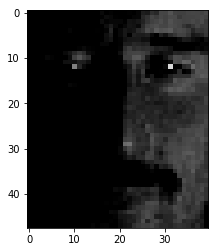

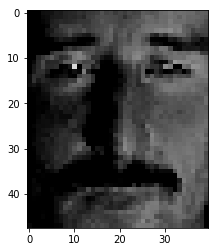

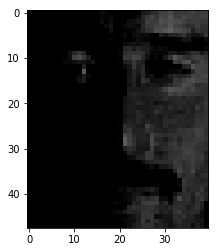

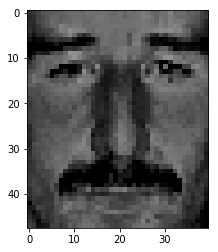

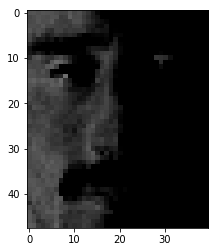

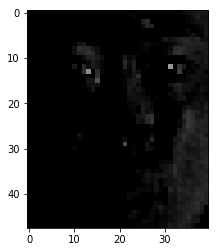

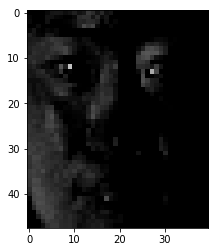

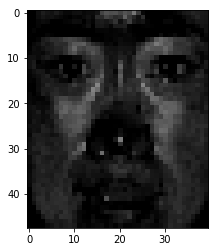

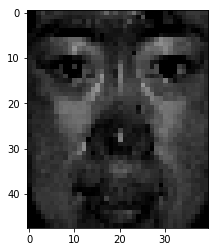

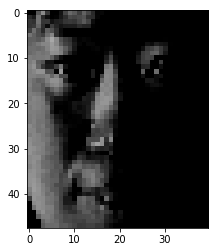

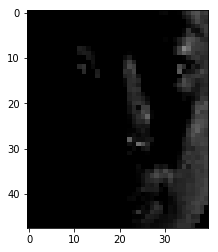

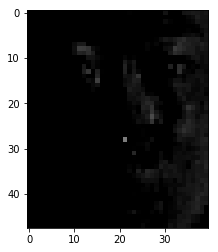

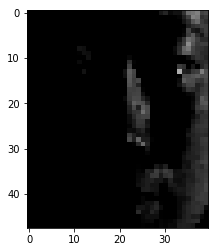

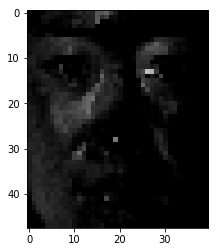

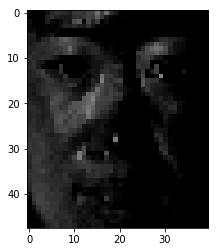

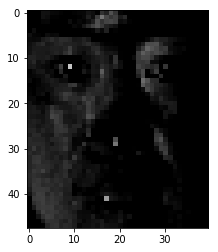

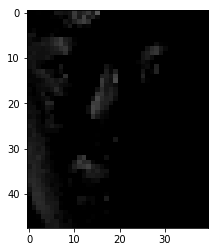

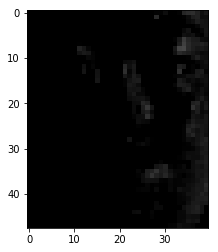

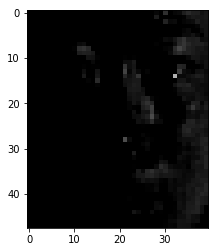

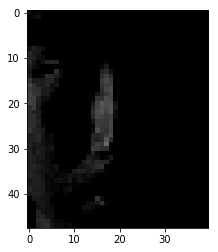

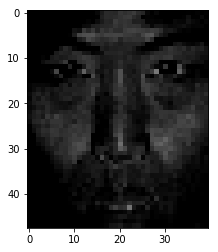

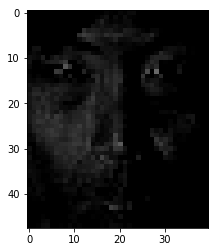

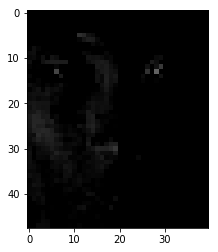

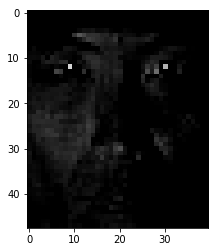

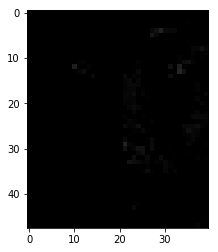

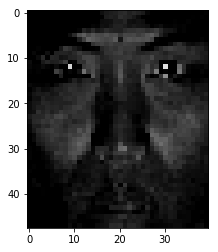

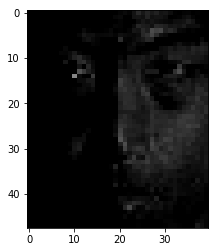

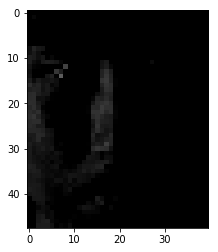

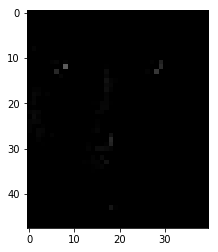

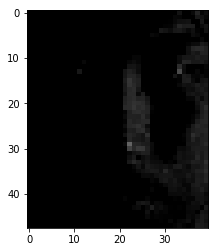

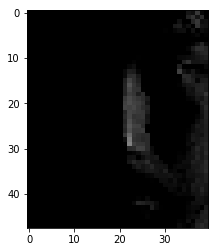

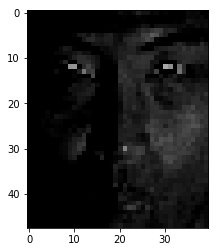

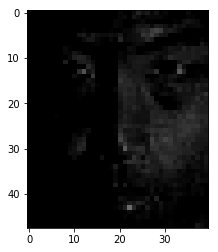

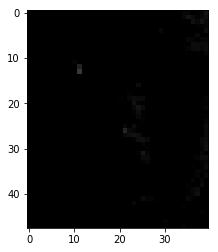

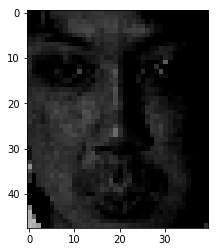

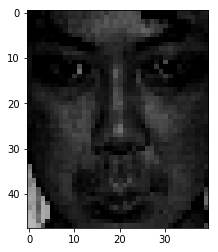

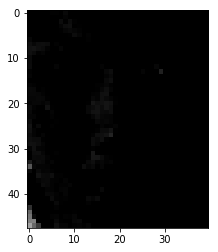

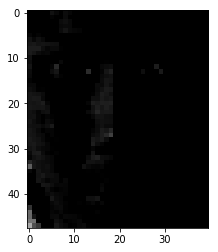

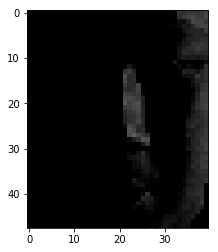

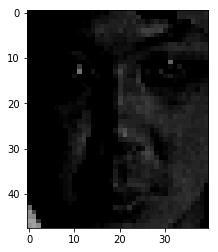

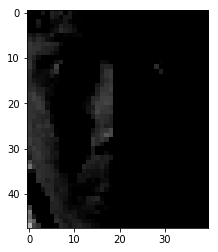

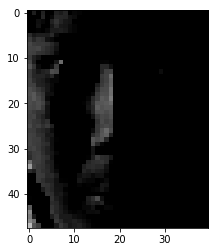

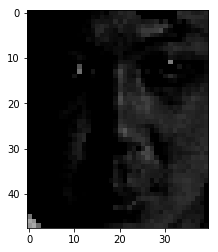

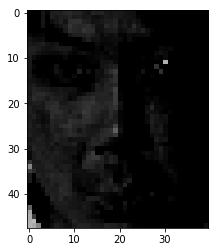

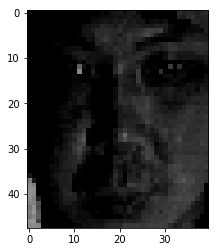

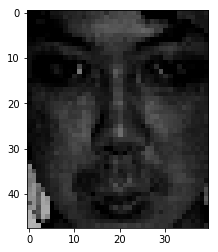

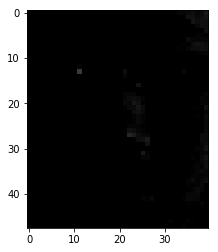

In [29]:

for i in img:
    img_1 = convert_to_img(i)
    plt.imshow(img_1)
    plt.show()

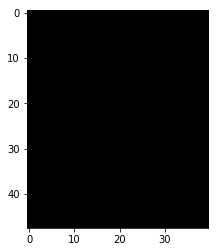

(1920,)


In [30]:
avg = [0]
for i in img:
    avg += i
img_1 = convert_to_img(avg)
    
plt.imshow(img_1)
plt.show()
print(img[0].shape)

In [31]:
#Create a list of train x and train y. Slice the filepath using split function to get the training label as shown in an example before.
train_X = []
train_Y = []
for name in face_dir_train:
    chunk = name.split('train/')
    for name_1 in illum_dir_train:
        chunk_2 = name_1.split('_')
        if(chunk[-1]==chunk_2[-2]):
            train_X.append(imageio.imread(name+ '/' +name_1).flatten(order='F'))
            train_Y.append(chunk_2[-2])


In [32]:
#similarly do it for test
test_X = []
test_Y = []
for name in face_dir_test:
    chunk = name.split('test/')
    for name_1 in illum_dir_test:
        chunk_2 = name_1.split('_')
        if(chunk[-1]==chunk_2[-2]):
            test_X.append(imageio.imread(name+ '/' +name_1).flatten(order='F'))
            test_Y.append(chunk_2[-2])


In [33]:
#list of images
#train_X

[Image([ 78.108536,  78.967445,  73.38655 , ...,  18.733541,  13.096992,
        -28.561625], dtype=float32),
 Image([85.44188 , 90.6341  , 81.71988 , ..., 30.066877, 26.09699 ,
        -9.228292], dtype=float32),
 Image([-41.22479 , -41.69923 , -43.613445, ...,  26.066877,  54.43032 ,
        108.771706], dtype=float32),
 Image([ 99.108536 , 103.967445 ,  95.38655  , ...,  -5.266455 ,
         -4.9030123, -32.22829  ], dtype=float32),
 Image([-46.22479 , -45.032562, -42.94678 , ...,  17.066877,  31.430319,
         63.438374], dtype=float32),
 Image([ 93.44188 ,  92.967445,  84.71988 , ...,  25.733541,  12.096992,
        -23.894958], dtype=float32),
 Image([-34.558125, -39.365894, -36.613445, ...,  28.066877,  38.096992,
         64.43838 ], dtype=float32),
 Image([-32.22479 , -37.032562, -42.613445, ...,  22.400213,  38.43032 ,
         64.10504 ], dtype=float32),
 Image([-11.891458, -14.69923 , -23.280113, ...,  27.400213,  42.43032 ,
         69.77171 ], dtype=float32),
 Image([ 4

In [34]:
#test_X

[Image([ 69.10854 ,  74.6341  ,  72.38655 , ..., -25.266457,  -8.569676,
         45.77171 ], dtype=float32),
 Image([ 70.108536,  75.6341  ,  63.05322 , ..., -23.599789,  10.096992,
         70.77171 ], dtype=float32),
 Image([ 62.108547 ,  63.967434 ,  54.05322  , ...,   1.7335447,
         -2.2363446, -25.22829  ], dtype=float32),
 Image([-44.558125, -46.69923 , -46.280113, ...,  17.400213,  21.430319,
         47.105038], dtype=float32),
 Image([11.4418745,  6.3007703,  3.0532227, ..., 44.40021  , 56.096992 ,
        79.43838  ], dtype=float32),
 Image([ 63.441875,  64.96744 ,  57.05322 , ..., -17.59979 , -14.236344,
         17.10504 ], dtype=float32),
 Image([ 55.108547 ,  53.967434 ,  42.386555 , ...,  -2.5997913,
         -4.9030123, -32.22829  ], dtype=float32),
 Image([-10.558122, -13.69923 ,  -9.280113, ..., -46.933125, -46.236343,
        -46.561626], dtype=float32),
 Image([-14.891458, -15.365898, -13.613445, ..., -47.59979 , -46.90301 ,
        -46.561626], dtype=float32)

# KNN

In [35]:
#Define func for euclidian
def euclideanDistance(vec1, vec2):
    distance = 0
    for x in range(len(vec1)):
        distance = distance + math.pow((vec1[x] - vec2[x]), 2)
    return math.sqrt(distance)


In [36]:
# calculate the eulcidian distance between each record in the dataset to the new piece of data

#Then,sort all of the records in the training dataset by their distance to the new data. select the top k to return as the most similar neighbors.


from queue import PriorityQueue

def get_Neighbors(train_X, train_Y, test_sample, k_neighbours):
    distances = PriorityQueue()
    for i in range(len(train_X)):
       distances.put((euclideanDistance(test_sample, train_X[i]), train_Y[i]))
    neighbors = []
    for _ in range(k_neighbours):
        neighbors.append(distances.get())
    return neighbors

def maximum_votes(neighbors):
    votes = defaultdict(int)
    for i in range(len(neighbors)):
        label = neighbors[i][-1]
        votes[label] += 1
    return sorted(votes.items(), key=lambda k_v: k_v[1])[-1][0]

In [40]:
%%time
#Fit the data on KNN classifer defined above

predicted = []
for i in range(len(test_X)):
    neighbours = get_Neighbors(train_X,train_Y,test_X[i],1)
    predicted.append(maximum_votes(neighbours))

CPU times: user 15min 11s, sys: 136 ms, total: 15min 11s
Wall time: 15min 11s


In [41]:
#deine a list of correct and incorrect predictions and check the overall accuracy on the test data
acc_list=[]
def accuracy():
    correct =0
    for i in range(len(test_Y)):
            if (predicted[i] == test_Y[i]):
                acc_list.append('True')
            else:
                acc_list.append('False')
acc = accuracy()
#acc_list

['False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 '

In [42]:
count =0 
for i in acc_list:
    if(i=="True"):
        count = count+1
    else:
        continue
print("Test accuracy for KNN classifier=",count/len(test_Y))

Test accuracy for KNN classifier= 0.8676470588235294


# PCA

In [43]:
#img[0].shape


(1920,)

In [44]:
"""For PCA:
    1. Calculate the covariance matrix
    2. Calculate the Eigen vectors and values"""
 #Also, Note that img here is already mean centered.
    #append column vector using np.newaxis for co-variance matrix
v = np.asarray(img[0])[np.newaxis].T
for i in img:
     new_v = i[np.newaxis].T
     v = np.append(v, new_v, axis=1)
cov_matrix = np.cov(v) #using numpy.cov
display(cov_matrix)

print(v)

array([[2127.36665957, 2101.27559637, 2062.63969788, ..., -783.04374656,
        -735.48226202, -738.04887513],
       [2101.27559637, 2153.62022888, 2144.89534762, ..., -826.387064  ,
        -782.42071345, -783.29579644],
       [2062.63969788, 2144.89534762, 2190.61840594, ..., -876.75342993,
        -835.95506717, -833.19799166],
       ...,
       [-783.04374656, -826.387064  , -876.75342993, ..., 2776.34483628,
        2851.3778899 , 2825.48687153],
       [-735.48226202, -782.42071345, -835.95506717, ..., 2851.3778899 ,
        3014.26246751, 3005.89723897],
       [-738.04887513, -783.29579644, -833.19799166, ..., 2825.48687153,
        3005.89723897, 3099.07718236]])

[[ 78.108536  78.108536  85.44188  ...  44.441875  32.441875  25.77521 ]
 [ 78.967445  78.967445  90.6341   ...  34.967434  24.967434  20.967434]
 [ 73.38655   73.38655   81.71988  ...  32.386555  20.053219  15.386555]
 ...
 [ 18.733541  18.733541  30.066877 ... 116.73355  174.73355  -35.59979 ]
 [ 13.096992  13.096992  26.09699  ... 146.09698  179.43033  -32.90301 ]
 [-28.561625 -28.561625  -9.228292 ... 138.10504  180.7717   -21.228292]]


In [45]:
#calculate eigen values and corresponding vectors from covariene matrix
eigen_vals, eigen_vecs = scipy.linalg.eigh(cov_matrix)

In [46]:
# sort eigenvalue in decreasing order
idx = eigen_vals.argsort()[::-1]   
eigen_vals = eigen_vals[idx]
eigen_vecs = eigen_vecs[:,idx]


In [47]:
#eigen_vecs

array([[-0.00635035, -0.02426411, -0.0132752 , ...,  0.08233897,
         0.09008713, -0.20354675],
       [-0.00678488, -0.02504066, -0.01493665, ...,  0.00196923,
        -0.25642916,  0.60941631],
       [-0.00732589, -0.02550801, -0.01709639, ..., -0.13303595,
         0.1558892 ,  0.11891899],
       ...,
       [ 0.01463971,  0.01175933, -0.01901673, ...,  0.01503033,
        -0.0018524 ,  0.02166321],
       [ 0.01521795,  0.01128178, -0.02158116, ..., -0.02314605,
         0.00928209, -0.02319731],
       [ 0.01579217,  0.01142969, -0.02127834, ...,  0.00080086,
         0.01700215,  0.00776559]])

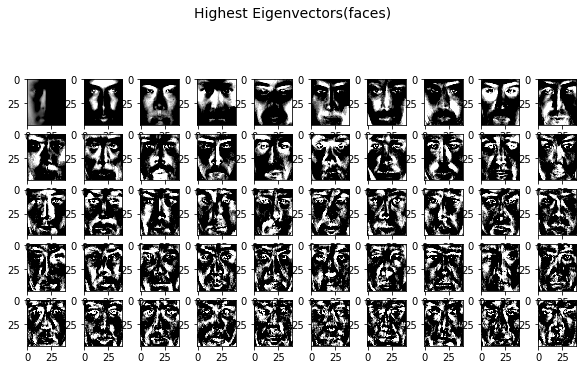

In [48]:
scale=1
fig=plt.figure(figsize=(10*scale, 10*scale))
columns = 10
rows = 10
for i in range(1, 51):
    img_3 = convert_to_img(eigen_vecs[:,i]*1e4)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_3)
fig.suptitle('Highest Eigenvectors(faces)', fontsize=14)
plt.show()

# KNN with Dimensionality reduction using PCA

In [49]:
#Select a range of eigen vectors by trial and error for good accuracy
new_eigen_vecs = eigen_vecs[:,5:10]

In [50]:
#Projecting the datapoints on these calculated eigenvectors. this is obtained by np.dot b'w data and eigenvector
pca_train_X = []
pca_test_X = []
for i in range(len(train_X)):
    pca_train_X.append(np.dot(new_eigen_vecs.T,train_X[i]))

for i in range(len(test_X)):
    pca_test_X.append(np.dot(new_eigen_vecs.T,test_X[i]))


In [51]:
#pca_train_X

[array([ 244.64548821, -244.03025737,  141.42259641, -167.99259221,
         139.77550186]),
 array([ 379.30838045, -237.34457036,  101.29977763, -198.73919971,
         221.28352758]),
 array([  12.37622571, -191.79833713, -216.99747867,   60.13413975,
         -80.99103629]),
 array([ 197.20965581, -161.88633226,  148.45024557, -264.29752715,
          71.18974916]),
 array([ 125.90359804, -200.57147815, -248.83494951,   21.47522274,
          11.90340997]),
 array([ 186.48455838, -241.25221865,  208.58450028, -228.07010403,
         109.15892077]),
 array([ 284.70349946, -334.89720623, -289.16267953,   87.23149589,
         -20.43599546]),
 array([ 167.39692716, -329.23792476, -254.70906618,   99.88847005,
         -39.22549855]),
 array([ 121.56411   , -418.81008591, -199.11371541,   99.90752323,
         -60.25457891]),
 array([ 126.03152145, -161.68065564,   84.39563111, -212.12919739,
         117.35599709]),
 array([ 137.71913607, -196.40363416, -230.90996447,  -12.03667647,
  

In [53]:
#Compute the accuracy
predicted_pca = []
for i in range(len(pca_test_X)):
    pca_neighbours = get_Neighbors(pca_train_X,train_Y,pca_test_X[i],1)
    predicted_pca.append(maximum_votes(pca_neighbours))

pca_acc_list=[]
def pca_accuracy():
    for i in range(len(test_Y)):
            if (predicted_pca[i] == test_Y[i]):
                pca_acc_list.append('True')
            else:
                pca_acc_list.append('False')
acc = pca_accuracy()
count =0 
for i in pca_acc_list:
    if(i=="True"):
        count = count+1
    else:
        continue
print("Test accuracy of KNN using PCA=",count/len(test_Y))

Test accuracy of KNN using PCA= 0.7752100840336135
